<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.06/bds_espacial_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>


<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/geopandas_logo_big.png?raw=true" width="280">
</p>

 # **<font color="DeepPink">Modelos de datos espaciales</font>**




 ## **<font color="DeepPink">Dependencia espacial</font>**

<p align="justify">
Cuando estudiamos los modelos de Machine learning en corte transversal habitualmente los hacemos de la siguiente forma:
<br><br>
\begin{equation}{
  y_i = \mathcal{f}(\mathbf{X}_i) + \epsilon_i    
}
\end{equation}

\begin{equation}{
  \epsilon_i \sim D\left(0, \sigma^2 \right)   i= 1,\dots,n
}
\end{equation}
<br><p align="justify">
En donde $\mathbf{X}_i$ es un vector de $1 \times k$ variables explicativas.  $\mathcal{f}(\mathbf{X}_i)$ es una función desconocida que estamos interesados en estimar que puede ser una simple función lineal $\mathcal{f}\left(\mathbf{X}_i\right) = \mathbf{X}_i\beta$. Por otro lado, $D$ representa una distribución genérica que puede ser la normal o gaussiana.
<br><br>
El supuesto que estamos planteando aquí es que el proceso generador de datos mostrado anteriormente dice que una unidad $i$ es independiente de todas las otras unidades. Esto implica que $E\left(\epsilon_i \epsilon_j\right) = E(\epsilon_i)E(\epsilon_j)=0$. Esta asunción de independencia simplifica mucho el modelo, pero en los modelos espaciales esta simplificación se pierde.
<br><br>
En contraste, la dependencia espacial refleja una situacion donde cada valor observado en una ubicación o en una región, denominada observación $i$, depende de los valores de las observaciones vecinas o a aquellas que estan ubicadas en forma cercana. Supongamos que tenemos solo dos oservaciones que son vecinas entre si, entonces el proceso generador de datos para esta caso vendría dado de la siguiente forma.
<br><br>
\begin{equation}{
   y_1 = \alpha_1y_2+ \mathcal{f}(\mathbf{X}_1) + \epsilon_1    
}
\end{equation}


\begin{equation}{
   y_2 = \alpha_2y_1+ \mathcal{f}(\mathbf{X}_2) + \epsilon_2    
}
\end{equation}

\begin{equation}{
  \epsilon_1 \sim D\left(0, \sigma^2 \right)   
}
\end{equation}

\begin{equation}{
  \epsilon_2 \sim D\left(0, \sigma^2 \right)   
}
\end{equation}
<br><p align="justify">
Esta situación sugiere un proceso generador de datos que se da simultaneamente, esto quiere decir que el valor $y_1$ depende de lo observado en $y_2$ y vice versa.
<br><br>
En resumen, la dependencia espacial nos dice que una observación no solo va depender de las variables explicativas que usemos, si no que también lo va hacer de aquellas observaciones vecinas. Es decir, existe una relación entre las observaciones y a esa relación la definimos porque son puntos cercanos en el espacio.

 ## **<font color="DeepPink">Motivaciones para usar modelos espaciales</font>**

<p align='justify'>
El problema de la no independencia de los datos puede deberse a varios motivos que por limitaciones en los datos no podemos captarlos. La dependencia espacial, lo que hace, es asumir que esas relaciones no observadas dependen de su ubicación en el espacio.
<br><br>
A continuación listamos algunas causas que pueden generar las dependencias espaciales.
<ul align='justify'>
<b>Existencia de dependencia temporal</b>

Por ejemplo los gobernadores de las provincias pueden estar motivados a aumentrar sus impuestos debido a que las provincias vecinas lo han hecho primero. Si nosotros no tenemos la información temporal, esa dependencia se pude ver en el espacio.

<b>Que exista una variable omitida</b>

Es muy frecuente que ante nuestros datos no tengamos todas las variables explicativas. En estos casos, puede ser que la ubicación permita establecer esa explicación de manera indirecta. Por ejemplo un supermercado puede tener mejores ventas sólo porque esta ubicado en un lugar con alta densidad de población. Variable que por lo general, no la tenemos si solo tenemos ventas.

<b>Heterogeneidad</b>

Puede pasar que tengamos una gran diversidad en las observaciones que tenemos y esta se puede deber a las ubicaciones de las mismas. Un claro ejemplo de esto es el precio de las viviendas, es sabido que la ubicación influye significativamente y esto es lo que puede estar explicando porque casas de igual tamaño y modernidad, tengan diferentes precios.

<b>Externalidades</b>

Las externalidades pueden ser positivas o negativas y reflejan que ciertas actividades producen efectos en las actividades de otros agentes ajenos a la misma. Por ejemplo, la colocación de un aeropuerto influye en la presencia de hoteles o la contaminación del agua afecta a los productos agrícolas.



 ## **<font color="DeepPink">Instalación y carga de bibliotecas</font>**

In [1]:
! pip install folium
! pip install mapclassify
! pip install pysal
%reload_ext autoreload
%autoreload 2
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 30.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 23.7 MB/s eta 

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests # Para descargar archivos de internet
import zipfile  # Para descomprimir archivos zip

 ## **<font color="DeepPink">Conjunto de datos</font>**

In [4]:
url = "https://github.com/pabanib/dataframes/raw/master/airbnb/caba_airbnb.csv"
nombre_archivo = "caba_airbnb.csv"  # Nombre del archivo local para guardar los datos descargados

try:
    # Realizar la solicitud HTTP para descargar el archivo
    respuesta = requests.get(url)

    # Verificar si la descarga fue exitosa (código de respuesta 200)
    if respuesta.status_code == 200:
        # Guardar el contenido descargado en un archivo local
        with open(nombre_archivo, "wb") as archivo:
            archivo.write(respuesta.content)
        print("Archivo descargado exitosamente como:", nombre_archivo)
    else:
        print("Error al descargar el archivo. Código de respuesta:", respuesta.status_code)
except requests.RequestException as e:
    print("Error durante la solicitud HTTP:", e)




Archivo descargado exitosamente como: caba_airbnb.csv


👀cargamos los archivos zip y los descomprimimos en el entorno de colab para luego leerlos

In [5]:
# URL de los archivos ZIP que deseas descargar (enlaces raw)
url1 = "https://github.com/pabanib/dataframes/raw/master/censo/caba_dptos.zip"
url2 = "https://github.com/pabanib/dataframes/raw/master/censo/radios_caba.zip"

# Descargar y descomprimir el primer archivo ZIP
try:
    respuesta1 = requests.get(url1, stream=True)
    respuesta1.raise_for_status()
    with open("caba_dptos.zip", "wb") as archivo_zip1:
        for chunk in respuesta1.iter_content(chunk_size=8192):
            archivo_zip1.write(chunk)
    with zipfile.ZipFile("caba_dptos.zip", 'r') as zip_ref:
        zip_ref.extractall('/content/')                                         # Reemplaza '/content/' por la carpeta donde deseas descomprimir los archivos
    print("Archivo ZIP 1 descomprimido correctamente.")
except requests.exceptions.RequestException as e:
    print("Error al descargar o descomprimir el archivo ZIP 1:", e)

# Descargar y descomprimir el segundo archivo ZIP
try:
    respuesta2 = requests.get(url2, stream=True)
    respuesta2.raise_for_status()
    with open("radios_caba.zip", "wb") as archivo_zip2:
        for chunk in respuesta2.iter_content(chunk_size=8192):
            archivo_zip2.write(chunk)
    with zipfile.ZipFile("radios_caba.zip", 'r') as zip_ref:
        zip_ref.extractall('/content/')                                         # Reemplaza '/content/' por la carpeta donde deseas descomprimir los archivos
    print("Archivo ZIP 2 descomprimido correctamente.")
except requests.exceptions.RequestException as e:
    print("Error al descargar o descomprimir el archivo ZIP 2:", e)


Archivo ZIP 1 descomprimido correctamente.
Archivo ZIP 2 descomprimido correctamente.


 ## **<font color="DeepPink">Preparación de datos</font>**


### **<font color="DeepPink">Lectura de archivos</font>**


In [6]:
df = pd.read_csv("caba_airbnb.csv")
df.head()

latitude  longitude  bathrooms    bathrooms_text  bedrooms  beds  \
0 -34.57896  -58.43448        NaN            1 bath       1.0   1.0   
1 -34.60728  -58.41949        NaN  1.5 shared baths       1.0   1.0   
2 -34.59495  -58.40440        NaN            1 bath       1.0   1.0   
3 -34.57943  -58.48487        NaN           2 baths       1.0   2.0   
4 -34.59234  -58.39956        NaN            1 bath       1.0   1.0   

        price  minimum_nights  maximum_nights  minimum_minimum_nights  ...  \
0  $10,401.00               7              90                       7  ...   
1   $2,692.00               3           10000                       3  ...   
2  $13,522.00               5             180                       5  ...   
3   $9,318.00               1            1125                       1  ...   
4   $9,465.00              14            1125                      14  ...   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         5.00                    5.00                 4.56   
1                         4.82                    4.61                 4.71   
2                         4.96                    4.75                 4.78   
3                         4.50                    4.50                 5.00   
4                         4.95                    4.90                 4.40   

   license  instant_bookable  calculated_host_listings_count  \
0      NaN                 f                               1   
1      NaN                 f                               2   
2      NaN                 f                              24   
3      NaN                 f                               2   
4      NaN                 f                              30   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           0   
2                                          24   
3                                           0   
4                                          29   

   calculated_host_listings_count_private_rooms  \
0                                             0   
1                                             2   
2                                             0   
3                                             2   
4                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.06  
1                                            0               0.29  
2                                            0               0.89  
3                                            0               0.03  
4                                            0               0.19  

[5 rows x 41 columns]

In [7]:
def conv_numero(tex):
    t = tex.replace('$','').replace(',','')
    return float(t)

df.price = df.price.apply(conv_numero)


### **<font color="DeepPink">Conversión a geodataframe</font>**

In [8]:
geo = gpd.points_from_xy(x = df.longitude,y =  df.latitude)
gdf = gpd.GeoDataFrame(df[['price','bedrooms','minimum_nights','maximum_nights']], geometry= geo)
gdf.head()

price  bedrooms  minimum_nights  maximum_nights  \
0  10401.0       1.0               7              90   
1   2692.0       1.0               3           10000   
2  13522.0       1.0               5             180   
3   9318.0       1.0               1            1125   
4   9465.0       1.0              14            1125   

                      geometry  
0  POINT (-58.43448 -34.57896)  
1  POINT (-58.41949 -34.60728)  
2  POINT (-58.40440 -34.59495)  
3  POINT (-58.48487 -34.57943)  
4  POINT (-58.39956 -34.59234)

In [9]:
gdf.crs = "WGS 84"
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### **<font color="DeepPink">Juntando datos de diferentes datasets</font>**

<p align='justify'>
Una de las ventajas que ofrecen los datos georeferenciados es que ahora tenemos un criterio para unir conjuntos de datos de diferentes fuentes ya que ese patrón, es el geográfico.
<br><br>
En este caso podemos juntar los datos que nos proporciona Airbnb con los provenientes del censo Nacional 2022 que ya estuvimos analizando. De esta forma podemos darle un contexto geográfico más amplio a los alquileres temporales.


Algunos de los campos significan:
<ul align='justify'>
<br>
<li>ind01: cantidad de viviendas en la región.
<br><br>
<li>ind05: cantidad de casas expresadas como cociente entre casas y el total de viviendas particulares.
<br><br>
<li>ind06: cantidad de departamentos expresados como el cociente entre departamentos y el total de viviendas particulares.
<br><br>
<li>ind07: cantidad de departamentos en edificios de altura  expresado como el cociente entre este tipo de departamento y el total de viviendas tipo departamento.
</ul>

In [10]:
# Leemos los datos del censo, en este caso el que define las comunas dentro de CABA y los radios censales
caba = gpd.read_file("caba_dptos.shp")
radios = gpd.read_file("radios_caba.shp")
radios.head()

id                           nomloc       area  perimeter prov depto  \
0  21777  Ciudad Autónoma de Buenos Aires  18085.428    538.611   02   105   
1  29146  Ciudad Autónoma de Buenos Aires  14422.446    483.324   02   028   
2  16605  Ciudad Autónoma de Buenos Aires  31732.386    722.934   02   098   
3   2054  Ciudad Autónoma de Buenos Aires  61062.792   1003.555   02   063   
4  22763  Ciudad Autónoma de Buenos Aires  10385.005    413.905   02   035   

  codloc frac radio          link ind01 ind05  ind06  ind07  \
0    010   14    03  021050101403   413   1.7   98.3   92.6   
1    010   06    06  020280100606   459   0.0  100.0  100.0   
2    010   15    08  020980101508  1152   0.4   99.4   99.6   
3    010   05    10  020630100510   406  36.5   62.3    0.0   
4    010   09    03  020350100903   350   1.4   98.6   97.1   

                           nomprov   nomdepto  \
0  Ciudad Autónoma de Buenos Aires  Comuna 15   
1  Ciudad Autónoma de Buenos Aires   Comuna 4   
2  Ciudad Autónoma de Buenos Aires  Comuna 14   
3  Ciudad Autónoma de Buenos Aires   Comuna 9   
4  Ciudad Autónoma de Buenos Aires   Comuna 5   

                                            geometry  
0  POLYGON ((-58.44165 -34.59722, -58.44273 -34.5...  
1  POLYGON ((-58.40633 -34.63087, -58.40492 -34.6...  
2  POLYGON ((-58.41825 -34.58358, -58.41965 -34.5...  
3  POLYGON ((-58.50523 -34.64480, -58.50600 -34.6...  
4  POLYGON ((-58.41692 -34.60470, -58.41705 -34.6...

In [11]:
columnas = {"ind01":"viviendas", "ind05": "casas", "ind06":"dptos1", "ind07": "dptos2"}

radios = radios.rename(columns = columnas)
radios.head()

id                           nomloc       area  perimeter prov depto  \
0  21777  Ciudad Autónoma de Buenos Aires  18085.428    538.611   02   105   
1  29146  Ciudad Autónoma de Buenos Aires  14422.446    483.324   02   028   
2  16605  Ciudad Autónoma de Buenos Aires  31732.386    722.934   02   098   
3   2054  Ciudad Autónoma de Buenos Aires  61062.792   1003.555   02   063   
4  22763  Ciudad Autónoma de Buenos Aires  10385.005    413.905   02   035   

  codloc frac radio          link viviendas casas dptos1 dptos2  \
0    010   14    03  021050101403       413   1.7   98.3   92.6   
1    010   06    06  020280100606       459   0.0  100.0  100.0   
2    010   15    08  020980101508      1152   0.4   99.4   99.6   
3    010   05    10  020630100510       406  36.5   62.3    0.0   
4    010   09    03  020350100903       350   1.4   98.6   97.1   

                           nomprov   nomdepto  \
0  Ciudad Autónoma de Buenos Aires  Comuna 15   
1  Ciudad Autónoma de Buenos Aires   Comuna 4   
2  Ciudad Autónoma de Buenos Aires  Comuna 14   
3  Ciudad Autónoma de Buenos Aires   Comuna 9   
4  Ciudad Autónoma de Buenos Aires   Comuna 5   

                                            geometry  
0  POLYGON ((-58.44165 -34.59722, -58.44273 -34.5...  
1  POLYGON ((-58.40633 -34.63087, -58.40492 -34.6...  
2  POLYGON ((-58.41825 -34.58358, -58.41965 -34.5...  
3  POLYGON ((-58.50523 -34.64480, -58.50600 -34.6...  
4  POLYGON ((-58.41692 -34.60470, -58.41705 -34.6...

In [12]:
for c in radios.columns:
  try:
    v = radios[c].astype(float)
    radios[c] = v
  except:
    pass
radios.dtypes

id            float64
nomloc         object
area          float64
perimeter     float64
prov          float64
depto         float64
codloc        float64
frac          float64
radio         float64
link          float64
viviendas     float64
casas         float64
dptos1        float64
dptos2        float64
nomprov        object
nomdepto       object
geometry     geometry
dtype: object

In [13]:
# Proyetamos todos los gdf con el crs para Argentina epsg = 22177
gdf = gdf.to_crs(epsg = 22177)
caba = caba.to_crs(epsg = 22177)
radios = radios.to_crs(epsg = 22177)

gdf.crs == caba.crs, gdf.crs == radios.crs

(True, True)

### **<font color="DeepPink">Union de dataframes espaciales</font>**

<p align='justify'>
Si bien con <code>overlay()</code> podemos unir los <code>dataframe</code> no es precisamente la herramienta que ofrece geopandas para ello.
<br><br>
Para unir los GeoDataFrame tenemos dos opciones, la primera es conocer algun campo índice que nos permita distinguir de manera unívoca la fila y hacerlo de la misma forma como se hace con pandas.
<br><br>
La segunda opción, es unir los GeoDataFrame  de acuerdo a sus atributos espaciale, esta función se llama <code>sjoin()</code>.
<br><br>
Para utilizar dicha función debemos pasarle dos argumentos que son <code>how</code> y <code>predicate</code>.
<br><br>
El argumento how hace referencia a como se van a unir de acuerdo a los mismos criterios que en un df común (left, join, right).
<br><br>
<p align='justify'>
El argumento predicate es el que tiene que ver con los objetos espaciales y son los que usa la librería <code>shapely</code>:
<ul align='justify'>
<li><b>intersects</b>: va unir las filas en caso tengan algunos puntos en común.
<li><b>contains</b>: los une si el de la izquierda contiene a los de la derecha.
<li><b>whithin</b>: al revés que contains, los une si el de la derecha esta contenido en el de la izquierda. </ul>
<br>
<p align='justify'>
La geometría que prevalece es la de la izquierda y puede quedar repetida.

In [14]:
# Eliminamos los precios mayores a 100000.
gdf2 = gdf[gdf.price < 100000]
gdf2['cantidad'] = 1

# Unimos los dataframe en caso de que el departamento esté contenido en el radio censal.
radios_dptos = radios.sjoin( gdf2, how = 'left', predicate = 'contains')
radios_dptos.price = radios_dptos.price.fillna(0)
radios_dptos.bedrooms = radios_dptos.bedrooms.fillna(1)

# Filtramos el primer radio censal y notamos que contiene 5 departamentos en alquiler.
radios_dptos[radios_dptos.link == radios.link.iloc[0]]

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


id                           nomloc       area  perimeter  prov  \
0  21777.0  Ciudad Autónoma de Buenos Aires  18085.428    538.611   2.0   
0  21777.0  Ciudad Autónoma de Buenos Aires  18085.428    538.611   2.0   
0  21777.0  Ciudad Autónoma de Buenos Aires  18085.428    538.611   2.0   
0  21777.0  Ciudad Autónoma de Buenos Aires  18085.428    538.611   2.0   
0  21777.0  Ciudad Autónoma de Buenos Aires  18085.428    538.611   2.0   

   depto  codloc  frac  radio          link  ...  dptos2  \
0  105.0    10.0  14.0    3.0  2.105010e+10  ...    92.6   
0  105.0    10.0  14.0    3.0  2.105010e+10  ...    92.6   
0  105.0    10.0  14.0    3.0  2.105010e+10  ...    92.6   
0  105.0    10.0  14.0    3.0  2.105010e+10  ...    92.6   
0  105.0    10.0  14.0    3.0  2.105010e+10  ...    92.6   

                           nomprov   nomdepto  \
0  Ciudad Autónoma de Buenos Aires  Comuna 15   
0  Ciudad Autónoma de Buenos Aires  Comuna 15   
0  Ciudad Autónoma de Buenos Aires  Comuna 15   
0  Ciudad Autónoma de Buenos Aires  Comuna 15   
0  Ciudad Autónoma de Buenos Aires  Comuna 15   

                                            geometry index_right    price  \
0  POLYGON ((7092406.779 6163074.330, 7092311.998...     16499.0   5786.0   
0  POLYGON ((7092406.779 6163074.330, 7092311.998...     17185.0   5709.0   
0  POLYGON ((7092406.779 6163074.330, 7092311.998...      4764.0   4970.0   
0  POLYGON ((7092406.779 6163074.330, 7092311.998...     12143.0  11035.0   
0  POLYGON ((7092406.779 6163074.330, 7092311.998...     19905.0   6804.0   

  bedrooms  minimum_nights  maximum_nights  cantidad  
0      1.0             4.0            28.0       1.0  
0      1.0            10.0          1125.0       1.0  
0      1.0            29.0           360.0       1.0  
0      1.0             3.0             8.0       1.0  
0      1.0             3.0            10.0       1.0  

[5 rows x 23 columns]

In [15]:
radios_dptos.columns

Index(['id', 'nomloc', 'area', 'perimeter', 'prov', 'depto', 'codloc', 'frac',
       'radio', 'link', 'viviendas', 'casas', 'dptos1', 'dptos2', 'nomprov',
       'nomdepto', 'geometry', 'index_right', 'price', 'bedrooms',
       'minimum_nights', 'maximum_nights', 'cantidad'],
      dtype='object')

In [16]:
# Generamos un nuevo gdf que
caba_radios = radios_dptos.dissolve(by = 'link', aggfunc = {'nomdepto': 'first',
                                                            'area': 'first',
                                                            'perimeter': 'first',
                                                            'depto': 'first',
                                                             'viviendas':'first',
                                                            'casas':'first',
                                                            'dptos1':'first',
                                                            'dptos2':'first',
                                                             'cantidad': 'sum',
                                                            'price': 'mean',
                                                            'bedrooms': 'mean'
                                                            })
caba_radios

geometry   nomdepto  \
link                                                                         
2.007010e+10  POLYGON ((7099612.059 6163296.147, 7099566.622...   Comuna 1   
2.007010e+10  POLYGON ((7097443.160 6165290.468, 7097435.279...   Comuna 1   
2.007010e+10  POLYGON ((7097134.458 6165399.895, 7097151.999...   Comuna 1   
2.007010e+10  POLYGON ((7097394.909 6165198.972, 7097402.117...   Comuna 1   
2.007010e+10  POLYGON ((7097495.595 6165340.145, 7097495.596...   Comuna 1   
...                                                         ...        ...   
2.105010e+10  POLYGON ((7093381.116 6162941.718, 7093464.785...  Comuna 15   
2.105010e+10  POLYGON ((7093476.648 6163022.678, 7093557.078...  Comuna 15   
2.105010e+10  POLYGON ((7093668.870 6163013.561, 7093667.383...  Comuna 15   
2.105010e+10  POLYGON ((7093570.738 6163102.549, 7093672.971...  Comuna 15   
2.105010e+10  POLYGON ((7093943.368 6163072.069, 7093819.457...  Comuna 15   

                     area  perimeter  depto  viviendas  casas  dptos1  dptos2  \
link                                                                            
2.007010e+10  1768511.573  14257.869    7.0        7.0  100.0     0.0     0.0   
2.007010e+10    26435.751    846.109    7.0      206.0    0.0     0.0     0.0   
2.007010e+10    18205.694    783.225    7.0      158.0    0.0     0.0     0.0   
2.007010e+10    10873.153    491.621    7.0      133.0    0.0     0.0     0.0   
2.007010e+10    19557.106    885.961    7.0      193.0    0.0     0.0     0.0   
...                   ...        ...    ...        ...    ...     ...     ...   
2.105010e+10    19821.657    577.928  105.0      688.0    1.0    98.5    94.5   
2.105010e+10    16303.070    511.587  105.0      484.0    2.7    95.5    96.1   
2.105010e+10    17640.239    526.566  105.0      480.0    2.9    95.0     0.0   
2.105010e+10    20417.674    625.116  105.0      290.0   10.7    88.6    86.0   
2.105010e+10    38594.977    944.575  105.0      545.0    6.3    91.2    91.1   

              cantidad         price  bedrooms  
link                                            
2.007010e+10       7.0  11520.285714  1.000000  
2.007010e+10       0.0      0.000000  1.000000  
2.007010e+10       0.0      0.000000  1.000000  
2.007010e+10       0.0      0.000000  1.000000  
2.007010e+10       0.0      0.000000  1.000000  
...                ...           ...       ...  
2.105010e+10       8.0  11261.375000  1.250000  
2.105010e+10       9.0   9801.111111  1.111111  
2.105010e+10      13.0   8556.384615  1.000000  
2.105010e+10       4.0  10858.750000  1.250000  
2.105010e+10      24.0   9755.083333  1.166667  

[3778 rows x 12 columns]

<Axes: >

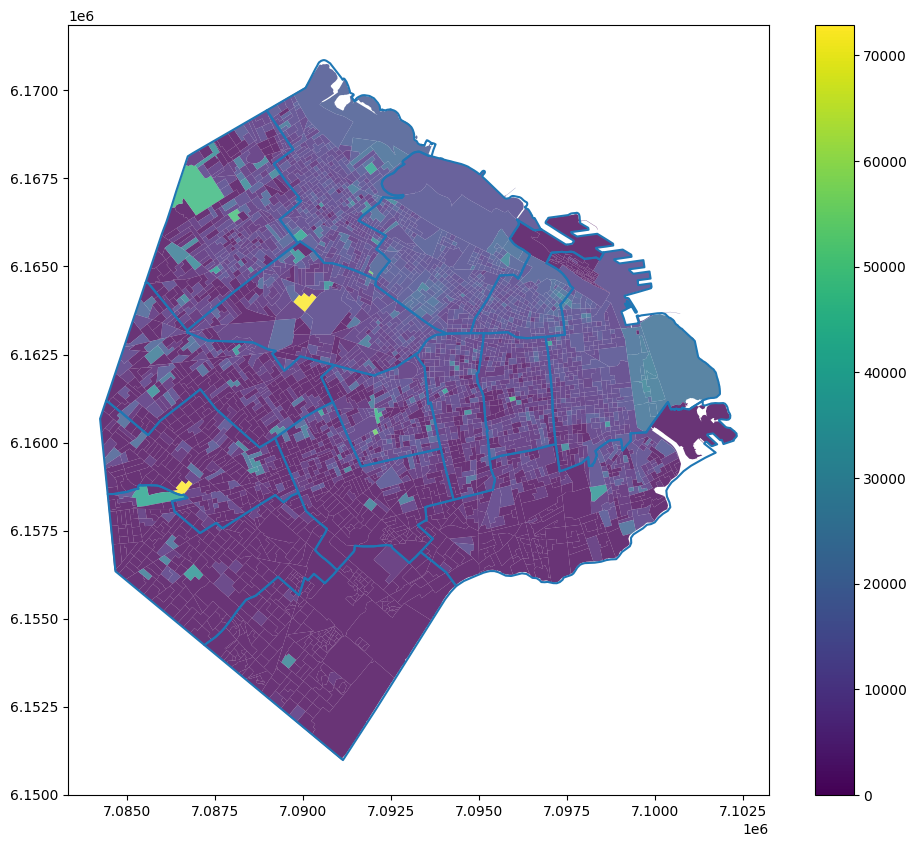

In [17]:
base = caba.boundary.plot(figsize = (12,10))
caba_radios.plot('price', ax = base, legend = True, alpha = 0.8)

<Axes: >

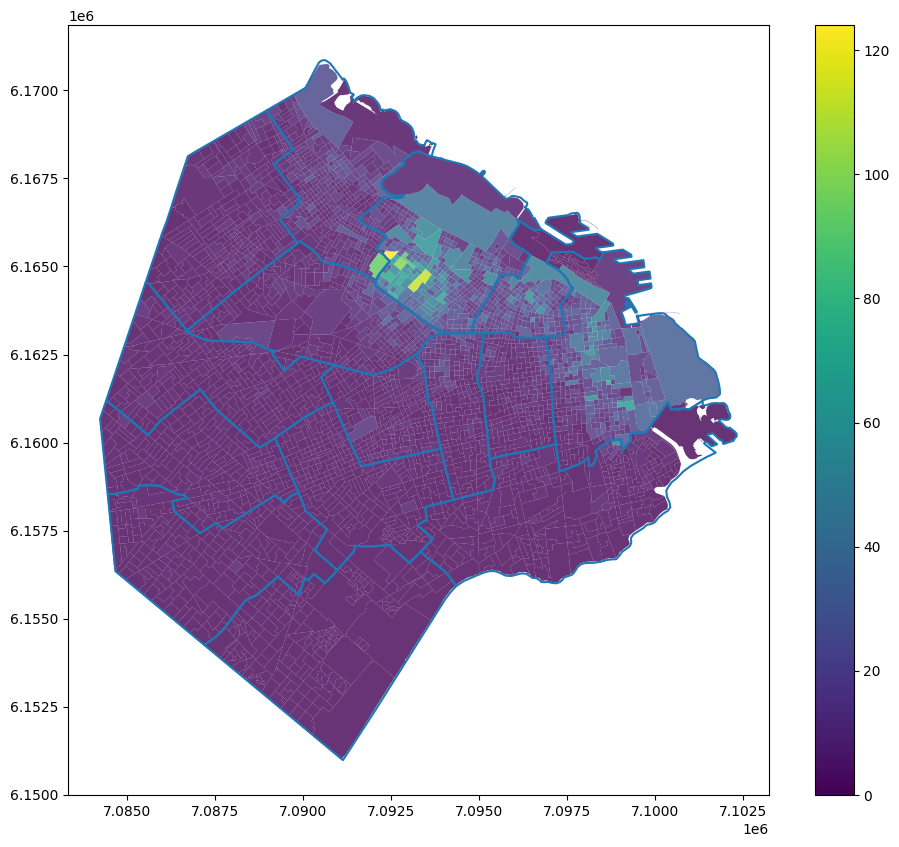

In [18]:
base = caba.boundary.plot(figsize = (12,10))
caba_radios.plot('cantidad', ax = base, legend = True, alpha = 0.8)

# **<font color="DeepPink">Matriz espacial</font>**

<p align='justify'>
Uno de los problemas cruciales en el análisis espacial es definir formalmente como se van a relacionar los vecinos. En este momento entra la noción de matriz espacial.
<br><br>
La matriz espacial o matriz de pesos espacial mas específico es una matriz $n \times n$ con valor cero en su diagonal principal (ninguna observación puede ser vecina de si misma) que define las relaciones que existen entre las distintas unidades y habitualmente se representan con la letra $W$. Las más utilizadas son las matrices denominadas binarias, que adoptan el valor de $1$ si los individuos son vecinos y $0$ en caso contrario.
<br><br>
Por ejemplo, supongamos que tenemos $4$ individuos ${a,b,c \space y\space d}$ y su matriz de pesos espaciales viene dada como la que se muestra a continuación:

\begin{equation}
W = \begin{bmatrix}
0 & 1 &0  &0 \\
1 & 0 &1  &0 \\
0 & 1 & 0 &1 \\
 0& 0 & 1 & 0
\end{bmatrix}
\end{equation}
<br><p align='justify'>
En la matriz podemos ver que cada fila represenata a la relación que tiene cada individuo con el resto de los individuos. Entonces podemos decir que $a$ es vecino de $b$ que $b$ es vecino de $a$ y $c$ y así con el resto.



<p align='justify'>
Vamos a trabajar con los datos ya preparados que une el df de radios censales con los departamentos en alquiler de Airbnb. Para trabajar con las matrices es mejor el trabajo mediante variables más agregadas ya que los puntos no muestran coninuidad en el espacio.

In [19]:
radios = caba_radios.copy()

<p align="justify">
👀 De la librería pysal utilizamos le módulo libpysal.weights que es el que nos va perimitir construir las matrices.

In [20]:
from libpysal.weights import Queen, Rook, KNN

In [21]:
radios.crs

<Projected CRS: EPSG:22177>
Name: POSGAR 98 / Argentina 7
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Argentina - east of 55°30'W, onshore.
- bounds: (-55.5, -28.11, -53.65, -25.49)
Coordinate Operation:
- name: Argentina zone 7
- method: Transverse Mercator
Datum: Posiciones Geodesicas Argentinas 1998
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## **<font color="DeepPink">Matriz tipo torre</font>**

<p align='justify'>
Las matrices más habituales son las de contigüidad. Le nombre viene a cuenta porque simula el movimiento de la torre de ajedrez para seleccionar los vecinos.

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/MatrizTorre.png?raw=true" width="150">
</p>

<p align='justify'>
Para construirla tenemos que utilizar el método <code>Rook.form_dataframe()</code> de <code>libpysal.weights</code> y le pasamos el GeoDataFrame que queremeos trabajar.

In [22]:
w_rook = Rook.from_dataframe(radios)

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 136 disconnected components.
 There are 119 islands with ids: 9, 21, 25, 27, 31, 33, 37, 38, 111, 123, 126, 127, 142, 155, 271, 340, 826, 829, 870, 904, 911, 914, 915, 918, 919, 934, 956, 972, 974, 992, 1015, 1028, 1054, 1056, 1057, 1058, 1059, 1062, 1063, 1064, 1538, 1560, 1642, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1710, 1712, 1713, 1714, 1715, 1718, 1721, 1722, 1723, 1724, 1725, 1731, 1757, 1758, 1760, 1772, 1782, 1794, 1795, 1798, 1806, 1807, 1808, 1810, 1811, 1813, 1814, 1815, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1868, 1869, 1872, 1873, 1874, 1875, 1876, 1878, 1880, 1942, 1943, 1944, 1945, 1946, 1949, 1950, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984.
  warnings.warn(message)


<p align='justify'>
Las advertencias se deben a que la matriz no se encuentra totalmente conectada, esto se lo conoce como "islas" y sería aquellas unidad que no tienen ningún vecino al rededor.
<br><br>
👀 El atributo n nos va decir la cantidad de unidades que tenemos...

In [23]:
w_rook.n

3778

<p align='justify'>
El atributo <code>pct_nonzero</code> nos permite saber que porcentaje de las conexiones es distino de $0$. La recomendación es que este porcentaje debe ser bajo, son mejores las matrices que tienen pocas conexiones (Overfitting).

In [24]:
w_rook.pct_nonzero

0.12067299999075196

In [25]:
len(w_rook.islands)

119

<p align='justify'>
Estamos trbajando con radios censales y es raro que tengamos islas ya que se suponen que deben venir juntos. Es por eso que vamos a chequear cuales son los radios que son islas en el mapa.

<Axes: >

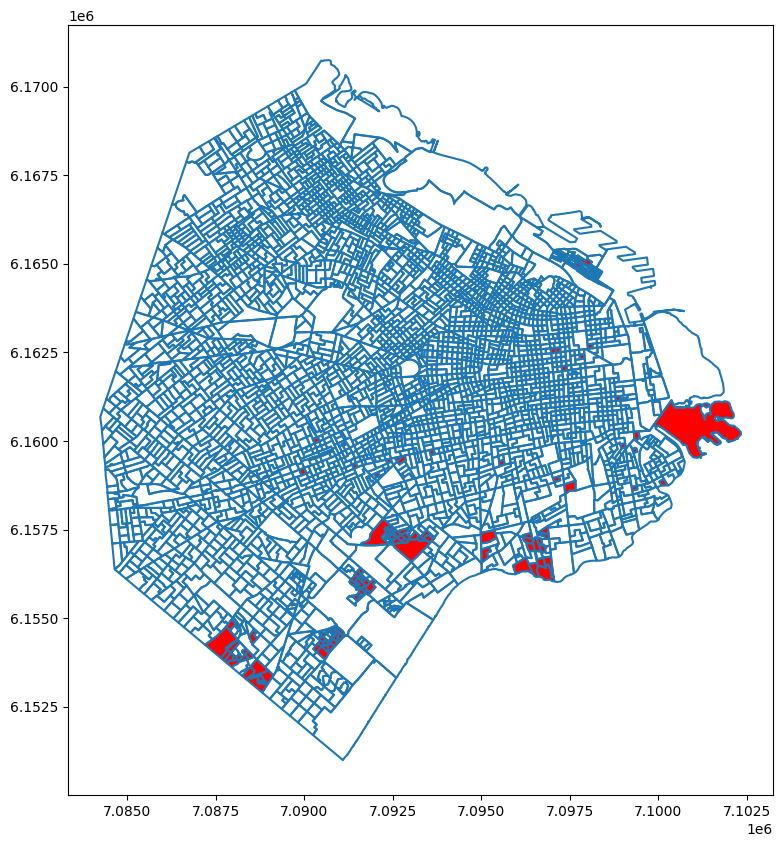

In [26]:
# Graficamos la base.
base = radios.boundary.plot(figsize = (12,10))
# Agregamos el gráfico de las islas y las pintamos de rojo.
radios.iloc[w_rook.islands].plot(ax = base, color = 'red')

Para no tener problemas con las islas vamos a trabajar con solo dos de las comunas como mostramos en el mapa.

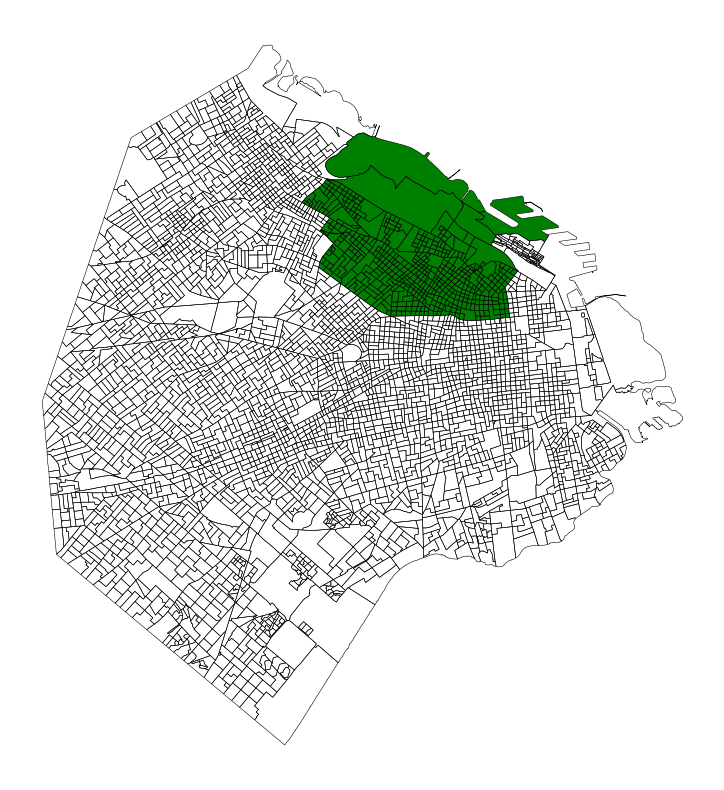

In [27]:
# Filtramos las comunas que queremos.
comuna2 = radios.query("depto in (14,98)")

# Realizamos el mapa.
base = radios.boundary.plot(figsize = (12,10), lw = 0.4, edgecolor = 'black')
comuna2.plot(ax = base, color = 'green')
base.set_axis_off()


In [28]:
# Hacemos un reseteo del índice para que quede numerado.
comuna2 = comuna2.reset_index()

# Calculamos la matriz nuevamente.
w_rook = Rook.from_dataframe(comuna2)
w_rook.n

524

In [29]:
w_rook.islands

[]

<p align='justify'>
Con el atributo <code>neighbors</code> se puede ver los vecinos que tiene cada uno de los índices.

In [30]:
w_rook.neighbors

{0: [1, 315],
 1: [0, 4, 519, 520, 314, 315],
 2: [523, 3, 4, 87],
 3: [521, 2, 523, 4],
 4: [1, 2, 3, 5, 6, 7, 520, 9, 75, 12, 76, 18, 20, 25, 26, 27],
 5: [4, 6, 7],
 6: [81, 4, 5, 7, 76],
 7: [8, 4, 5, 6],
 8: [81, 7, 9, 10, 11],
 9: [8, 4, 12],
 10: [8, 65, 11, 13],
 11: [8, 10, 12],
 12: [4, 9, 11, 13, 14, 15, 20, 21],
 13: [64, 10, 12, 14],
 14: [17, 58, 59, 12, 13, 15],
 15: [16, 12, 21, 14],
 16: [17, 34, 22, 15],
 17: [16, 35, 14, 63],
 18: [25, 19, 4, 20],
 19: [24, 18, 20],
 20: [18, 19, 4, 21, 23, 12],
 21: [20, 12, 22, 15],
 22: [16, 31, 21, 23],
 23: [24, 20, 22, 30],
 24: [25, 19, 28, 23],
 25: [24, 18, 26, 4],
 26: [25, 27, 4, 28],
 27: [26, 4, 28],
 28: [24, 26, 27, 29, 30],
 29: [32, 28, 30],
 30: [31, 28, 29, 23],
 31: [32, 34, 22, 30],
 32: [33, 29, 31],
 33: [32, 34, 36, 37],
 34: [16, 33, 35, 31],
 35: [17, 34, 36, 47],
 36: [48, 33, 35, 37],
 37: [48, 33, 36, 38, 40],
 38: [37, 39],
 39: [40, 42, 38],
 40: [49, 52, 37, 39, 41],
 41: [40, 42, 44, 53],
 42: [41, 43

<p align='justify'>
A continuación vamos a visualizar como quedan las conexiones dada la matriz espacial tipo torre.

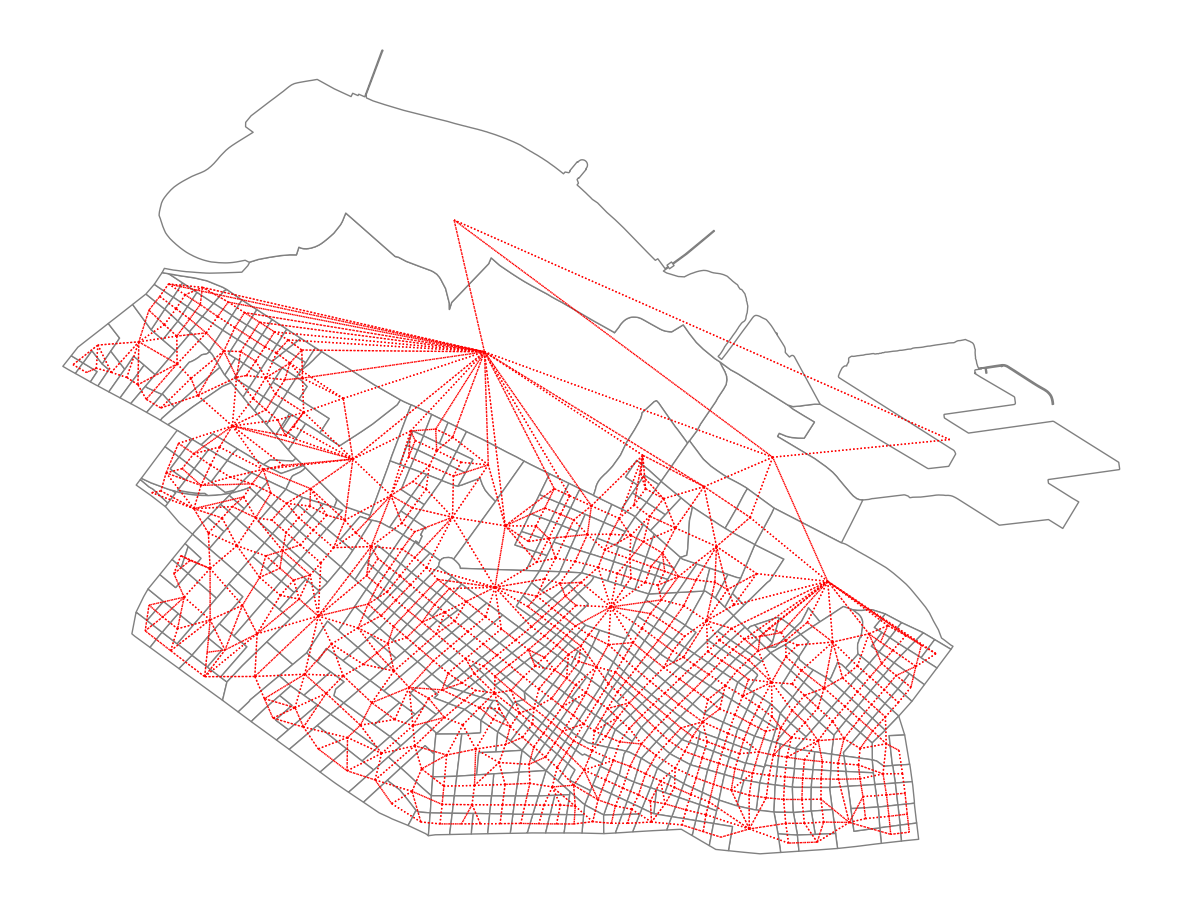

In [31]:
# Importamos esta librería para que no se vean los warninggs. La librería pysal esta arrojando algunos.
import warnings
warnings.filterwarnings('ignore')

# Parametrizamos el tamaño del gráfico.
plt.rcParams["figure.figsize"] = (15,13)

# Agregamos la base del mapa.
ax = comuna2.plot(edgecolor='grey', facecolor='w')

# Con el método w_rook.plot graficamos las conexiones.
f,ax = w_rook.plot(comuna2, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))

ax.set_axis_off()

## **<font color="DeepPink">Matriz tipo reina</font>**

<p align='justify'>
Otra matriz de contigüidad es la tipo reina que adopta el nombre simulando los movimientos de la reina en ajedrez.

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/MatrizReina.png?raw=true" width="150">
</p>

El objeto tiene los mismos atributos que el objeto Rook y se construye de la misma manera.

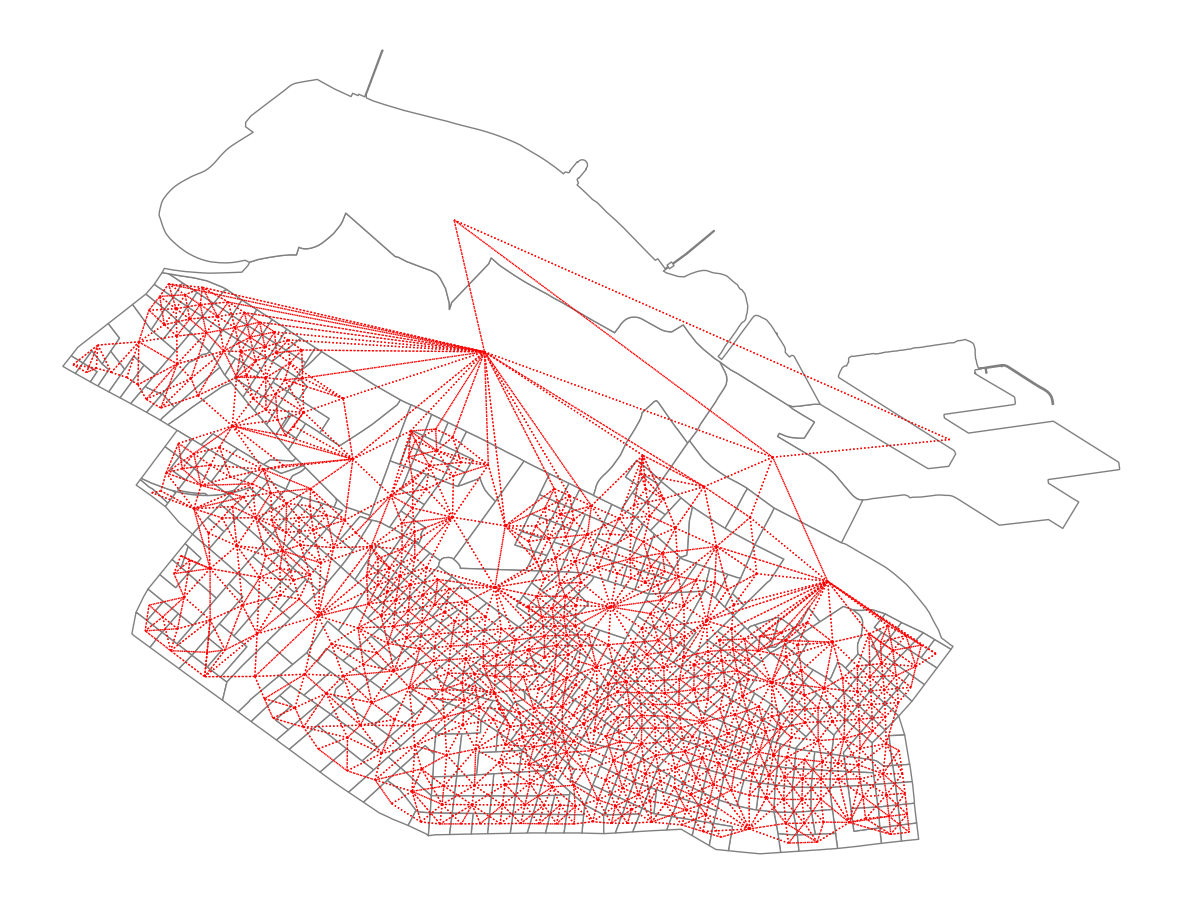

In [32]:
w_queen = Queen.from_dataframe(comuna2)

ax = comuna2.plot(edgecolor='grey', facecolor='w')
f,ax = w_queen.plot(comuna2, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))

ax.set_axis_off()

In [33]:
w_rook.pct_nonzero,w_queen.pct_nonzero

(0.8580502301730668, 1.3249519258784452)

Como se puede ver en el gráfico en el porcentaje de no ceros las matrices tipo reinas tienen más conexiones que las tipo torre.

## **<font color="DeepPink">Matriz de $k$ vecinos más cercanos</font>**

<p align='justify'>
Otra matriz muy utilizada es la que se forma con los $k$ vecinos más cercanos. A diferencia e las otras dos, esta no es una matriz simétrica ya que no siempre es recíproca la vecindad.
<br><br>
La cantidad de vecinos se elije por el usuario. En este caso probemos con 6 vecinos cada uno. Las formas de cosntruirla y los atributos es igual que en las anteriores solo que en esta hay que agregar los $k$ vecinos.

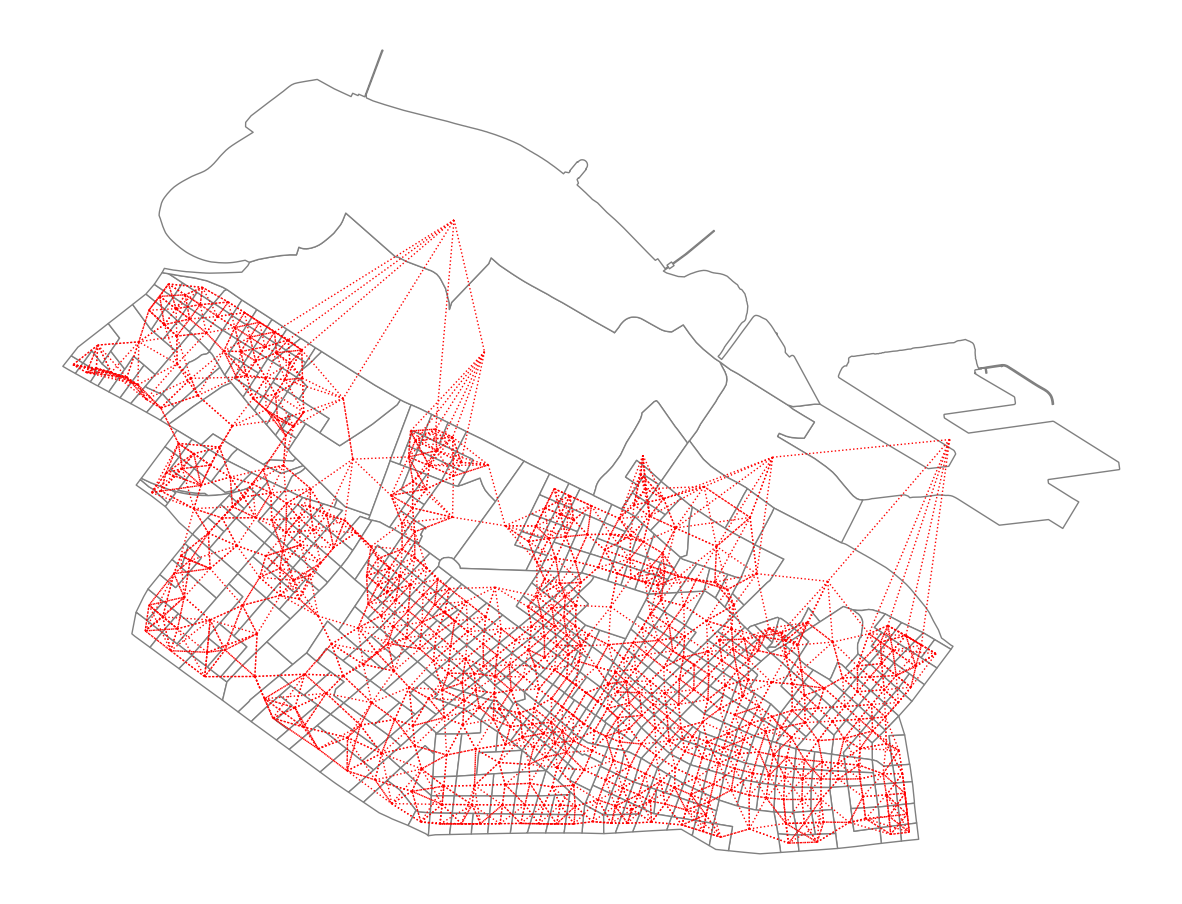

In [34]:
w_knn = KNN.from_dataframe(comuna2, k = 6)

ax = comuna2.plot(edgecolor='grey', facecolor='w')
f,ax = w_knn.plot(comuna2, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))

ax.set_axis_off()

In [35]:
w_rook.pct_nonzero,w_queen.pct_nonzero,w_knn.pct_nonzero

(0.8580502301730668, 1.3249519258784452, 1.1450381679389312)

<p align='justify'>
Este tipo de matriz tiene la ventaja que siempre va encontrar vecinos y por lo tanto no va tener islas. Pero en areas alejadas puede que considere como vecino areas muy alejadas

# **<font color="DeepPink">Autocorrelación espacial</font>**

<p align='justify'>
La inspección visual del patrón del mapa de precios nos permite buscar estructuras espaciales. Si la distribución espacial de los precios fuera aleatoria, no veríamos agrupamientos de valores similares en el mapa.
<br><br>
Nuestros cerebros son máquinas de reconocimiento de patrones muy poderosas. Sin embargo, a veces pueden ser demasiado potentes y llevarnos a detectar falsos positivos, es decir, patrones donde no existen patrones estadísticos. Esto es especialmente preocupante cuando se trata de visualizar polígonos irregulares de tamaños y formas diferentes.
<br><br>
El concepto de autocorrelación espacial se relaciona con la combinación de dos tipos de similitud: similitud espacial y similitud de atributos. Aunque existen muchas medidas diferentes de autocorrelación espacial, todas combinan estos dos tipos de similitud en una medida resumida.
<br><br>
Utilicemos <code>libpysal</code> para generar estas dos medidas de similitud.

## **<font color="DeepPink">Similaridad espacial</font>**

In [36]:
import esda
import libpysal as lps

In [37]:
# La transformación significa normalizar por fila.
w_queen.transform = 'r'
w_queen.sparse.todense().sum(axis = 1)

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

## **<font color="DeepPink">Similaridad en atributos</font>**

<p align='justify'>
Con la matriz de pesos espaciales  indicamos si dos unidades $i$ y $j$ son vecinos (es decir similaridad geográfica). Ahora necesitamos medir si tienen similaridad en los atributos con el concepto de similaridad espacial. El rezago espacial es una variable derivada de esta similitud. Para un área $i$ el rezago espacial se define como:

$$ylag_i = \sum_jw_{ij}y_j$$

In [38]:
y = comuna2['price'].fillna(comuna2['price'].mean())
ylag = lps.weights.lag_spatial(w_queen, y)
ylag

array([ 6270.2       , 14102.90326033, 13466.67534996, 16907.43211753,
       13108.66086844, 11522.30388996, 12032.85636094, 11741.95141866,
       12254.6683368 , 12439.87996968, 12164.2169201 , 12240.09098124,
       13888.37405771, 12560.77598802, 13915.13270888, 16511.62503714,
       16581.89951378, 14717.61329722, 17102.24243499, 19636.75666667,
       17753.35994618, 18233.81764777, 18928.98834325, 19672.42095588,
       18819.12286184, 16690.23621532, 18209.14891647, 16809.57243063,
       20364.43790031, 21389.69791667, 21034.92355275, 20747.57510729,
       21437.77960928, 15234.25119048, 16706.00060332, 14855.05352366,
       17156.0814526 , 14763.18302051, 14881.06060606, 13509.83563104,
       14598.18869388, 14732.54424304, 16193.76017316, 13512.92225275,
       12904.78988199, 15711.875     , 16796.19047619, 13869.76074747,
       13662.47794863, 15098.8830678 , 14850.22405061, 14017.58149411,
       12653.70707366, 14285.31195684, 14118.46293148, 13666.91298701,
      

<p align='justify'>
De esta manera podemos obtener los rezagos de la variable de nuestro interés. Podems graficar esto con quintiles con la función de <code> mapclassify.Quantiles()<code>  

In [39]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k = 5)

In [40]:
ylagq5

Quantiles

      Interval         Count
----------------------------
[ 4661.27, 10795.15] |   105
(10795.15, 11932.52] |   105
(11932.52, 12824.32] |   104
(12824.32, 14074.53] |   105
(14074.53, 21437.78] |   105

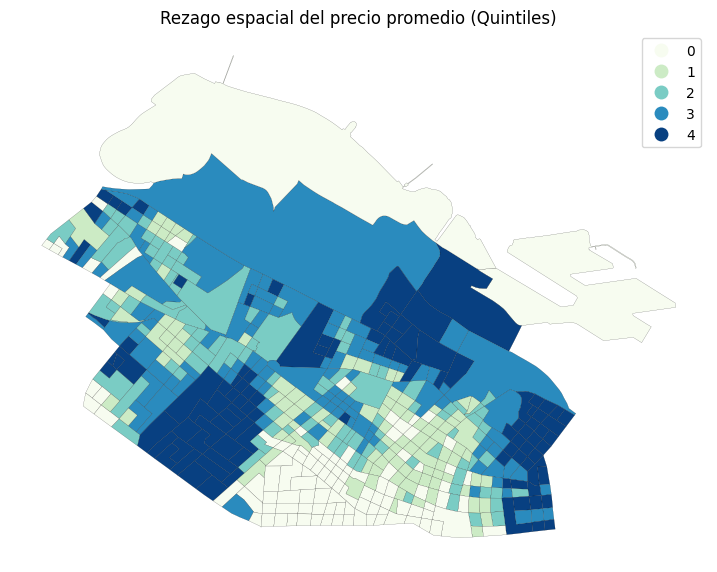

In [41]:
f, ax = plt.subplots(1, figsize=(9, 9))
comuna2.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='black', legend=True)
ax.set_axis_off()
plt.title("Rezago espacial del precio promedio (Quintiles)")

plt.show()

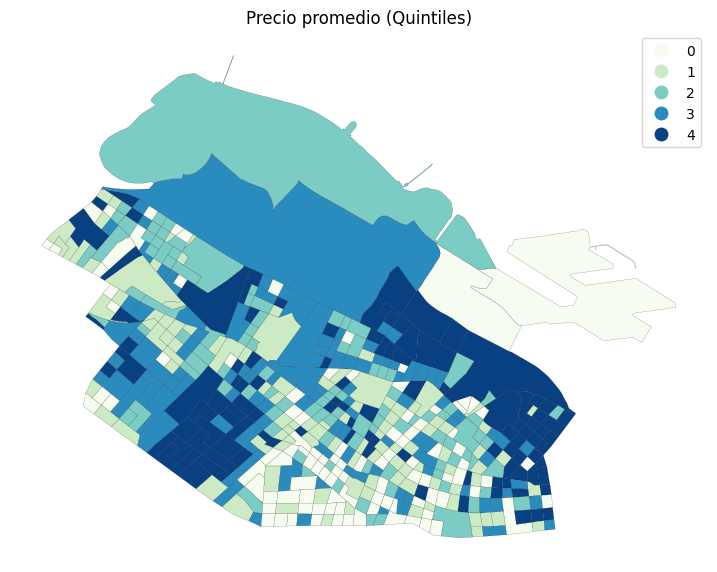

In [42]:
yq5 = mc.Quantiles(y, k = 5)
f, ax = plt.subplots(1, figsize=(9, 9))
comuna2.assign(cl=yq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='black', legend=True)
ax.set_axis_off()
plt.title("Precio promedio (Quintiles)")

plt.show()

### **<font color="DeepPink">Caso binarios</font>**

<p align='justify'>
En este caso podemos visualizar las zonas más cara y la más barata solo basándonos en un caso binario. O sea, vamos a considerar que si el precio está por encima del valor medio, entonces es un precio alto y viceversa.

In [43]:
yb = y > y.median()
sum(yb)

262

In [44]:
yb = y > y.median()
labels = ["0 bajo", "1 alto"]
yb = [labels[i] for i in 1*yb]
comuna2['yb'] = yb

<Axes: >

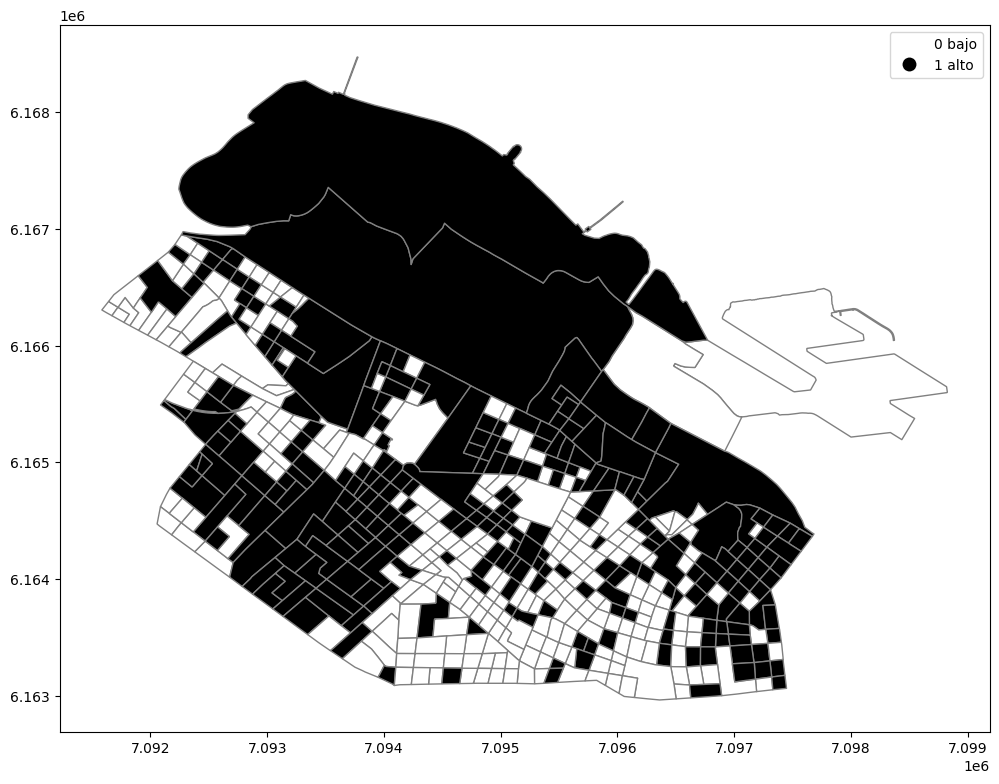

In [45]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
comuna2.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

## **<font color="DeepPink">Join Counts - Conteo de uniones</font>**

<p align='justify'>
Una forma de formalizar una prueba de autocorrelación espacial en un atributo binario es considerar las llamadas uniones o joins. Una unión existe para cada par de observaciones vecinas, y estas uniones se reflejan en nuestro objeto binario de pesos espaciales wq.
<br><br>
Cada unidad puede tener uno de dos valores: "Negro" o "Blanco", por lo que para un par de ubicaciones vecinas pueden surgir tres tipos diferentes de uniones:
<ul align='justify'>
<li>Negro Negro (BB)
<li>Blanco Blanco (WW)
<li>Negro Blanco (o Blanco Negro) (BW)
</ul>
<br>
<p align='justify'>
Dado que tenemos 101 polígonos Negros en nuestro mapa, ¿cuál sería el número de uniones Negro Negro (BB) que podríamos esperar si el proceso fuera tal que los polígonos Negros se asignaran al azar en el mapa? Esta es la lógica de las estadísticas de conteo de uniones.
<br><br>
Podemos utilizar el paquete esda de PySAL para llevar a cabo el análisis de conteo de uniones:

In [46]:
import numpy as np
yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(comuna2)
# Con la "b" transformamos la matriz en binaria
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

In [47]:
jc.bb

590.0

In [48]:
jc.ww

565.0

In [49]:
jc.bw

664.0

In [50]:
jc.bb + jc.ww + jc.bw

1819.0

In [51]:
wq.s0/2

1819.0

<p align='justify'>
La pregunta crítica para nosotros es si esto representa una desviación de lo que esperaríamos si el proceso que genera la distribución espacial de los polígonos Negros fuera completamente aleatorio. Para responder a esto, PySAL utiliza permutaciones espaciales aleatorias de los valores de atributos observados para generar una realización bajo la hipótesis nula de aleatoriedad espacial completa (CSR). Esto se repite un gran número de veces (por defecto, 999 veces) para construir una distribución de referencia y evaluar la significancia estadística de nuestros conteos observados.
<br><br>
El número promedio de uniones BB a partir de las realizaciones sintéticas es:

In [52]:
jc.mean_bb

454.06206206206207

<p align='justify'>
El cual es menor que los observados con nuestros conteos. La pregunta es ¿Nuestro conteo es muy diferente de la esperanza que calculamos anteriormente?

Text(0.5, 0, 'BB Counts')

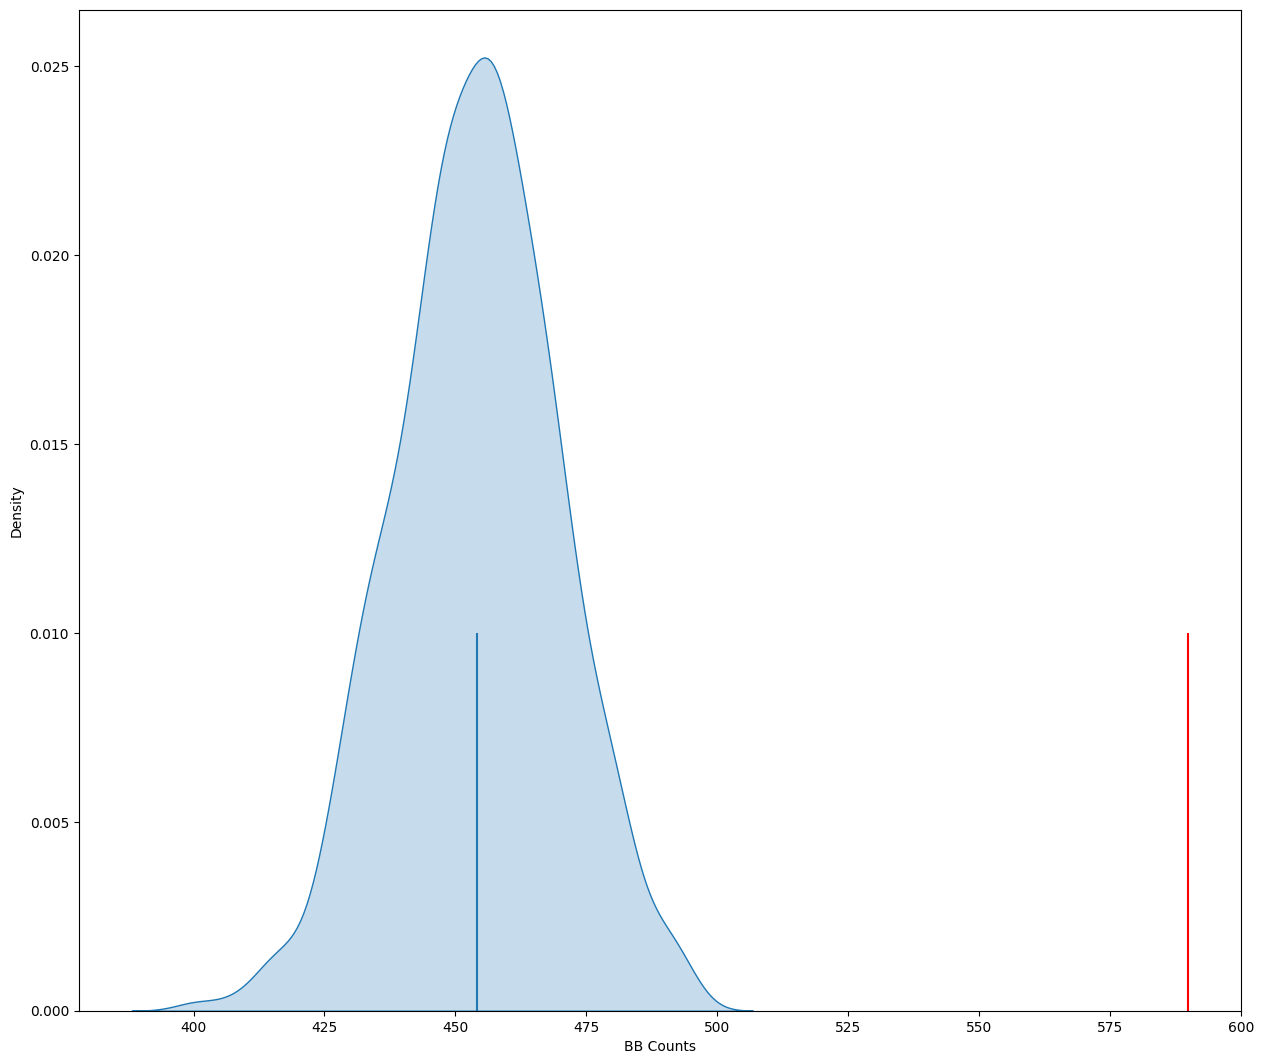

In [53]:
import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.01, color='r')
plt.vlines(jc.mean_bb, 0,0.01)
plt.xlabel('BB Counts')

In [54]:
jc.p_sim_bb

0.001

<p align='justify'>
Dado que esto está por debajo de los niveles de significación convencionales, rechazaríamos la hipótesis nula de la aleatoriedad espacial completa en favor de la autocorrelación espacial en los precios del mercado.

## **<font color="DeepPink">Caso continuo</font>**

<p align='justify'>
El análisis de conteo de uniones se basa en un atributo binario, lo que puede abarcar muchas aplicaciones empíricas interesantes donde uno está interesado en fenómenos de tipo presencia-ausencia. En nuestro caso, creamos artificialmente la variable binaria y, en el proceso, desechamos mucha información de nuestro atributo originalmente continuo. Al volver a la variable original, podemos explorar otras pruebas de autocorrelación espacial para el caso continuo. Este estadístico se denomina I de Moran y nos permite testear la correlación espacial.
<br><br>
Primero, transformamos nuestros pesos para que estén normalizados por fila, partiendo del estado binario actual:

In [55]:
wq.transform = 'r'

In [56]:
np.random.seed(46486)
mi = esda.moran.Moran(y, wq)
mi.I

0.3650159579879536

<p align='justify'>
Nuevamente, nuestro valor para el estadístico debe interpretarse en una distribución de referencia bajo el nulo de la RSE. Pysal utiliza un enfoque similar al que vimos en el análisis de recuento de uniones: permutaciones espaciales aleatorias.

Text(0.5, 0, "Moran's I")

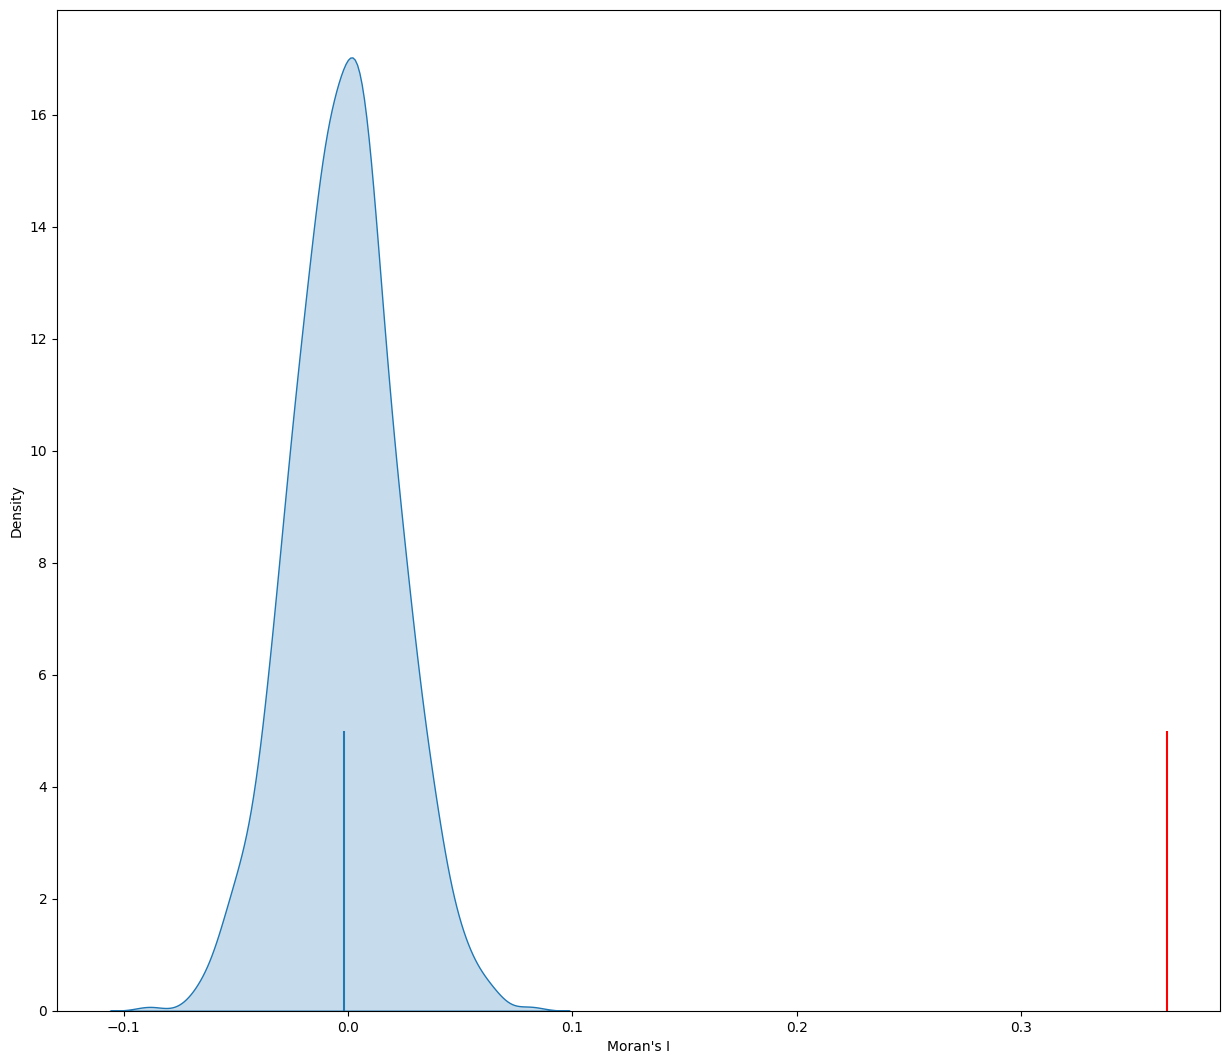

In [57]:
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 5, color='r')
plt.vlines(mi.EI, 0,5)
plt.xlabel("Moran's I")

In [58]:
mi.p_sim

0.001

## **<font color="DeepPink">Autocorrelación local</font>**

<p align='justify'>
Los indicadores locales nos permiten distinguir aquellas áreas en dónde la depencia espacial se hace más fuerte y en dónde no es significativa.
<br><br>
A estas áreas las podemos identificar de 5 maneras:
<ul align='justify'>
<li>Puntos caliente (HH): son aquellos en dónde si el precio es caro, también lo es el de los vecinos (correlación positiva).
<li>Puntos fríos  (LL) : son aquellos en dónde el precio es bajo y también el de los vecinos. (Correlación positiva).
<li>Doughnuts (donas) (LH): el valor del área es baja y el de los vecinos es alto.

<p align='justify'>
Autocorrelación local: puntos calientes, puntos fríos y valores atípicos espaciales
<br><br>
Además de las estadísticas globales de autocorrelación, Pysal tiene muchas estadísticas de autocorrelación local. Calculemos una estadística local de Moran para la misma base de datos.

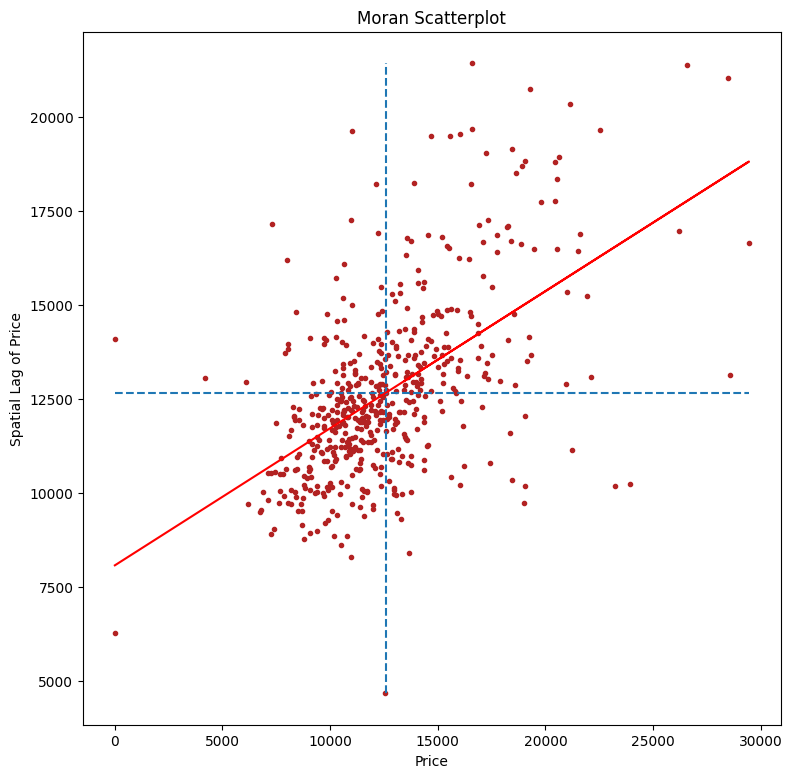

In [59]:
price = y
b, a = np.polyfit(price, ylag, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(price, ylag, '.', color='firebrick')

# La línea discontinua vertical es la media del precio.
plt.vlines(price.mean(), ylag.min(), ylag.max(), linestyle='--')

# La línea discontinua horizontal es la media del precio rezagado.
plt.hlines(ylag.mean(), price.min(), price.max(), linestyle='--')

# La línea roja es el mejor ajuste utilizando I global como pendiente.
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Price')
plt.xlabel('Price')
plt.show()

<p align='justify'>
Ahora, en lugar de un solo estadística, tenemos una variedad de estadísticos locales. Las estadísticas, almacenadas en el atributo .IS, y los valores p de la simulación están en P_SIM.

In [60]:
li = esda.moran.Moran_Local(y, wq)
li.q

array([3, 2, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 2, 2, 1, 4, 2, 1, 2, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 4, 4, 3, 2, 4, 4, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 3, 2, 4, 1, 4, 3, 4, 4,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 4, 2, 2, 1, 1, 3, 3, 2, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 2, 1, 2, 4, 2, 2, 3, 3, 2, 1,
       1, 1, 3, 2, 4, 2, 3, 3, 3, 1, 3, 4, 3, 3, 3, 3, 3, 2, 4, 2, 3, 2,
       3, 4, 1, 2, 3, 3, 3, 3, 4, 1, 1, 4, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       2, 1, 1, 2, 3, 1, 1, 1, 1, 4, 2, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 4,
       4, 4, 2, 3, 3, 3, 1, 1, 3, 3, 1, 2, 3, 3, 3,

<p align='justify'>
Podemos probar nuevamente la agrupación local utilizando permutaciones, pero aquí usamos permutaciones aleatorias condicionales (diferentes distribuciones para cada ubicación focal).

In [61]:
(li.p_sim < 0.05).sum()

154

In [62]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

In [63]:
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

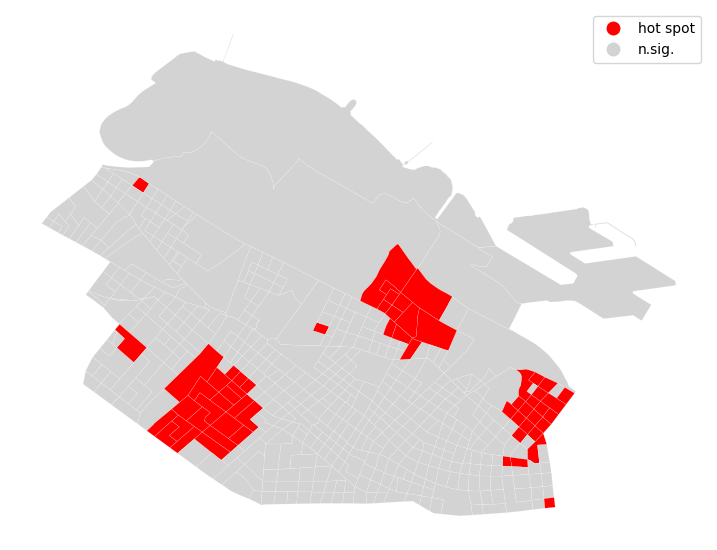

In [64]:
df = comuna2
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [65]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

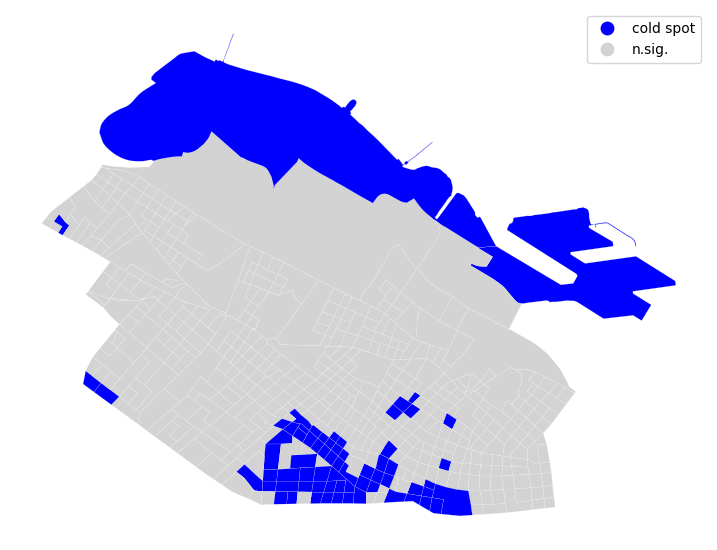

In [66]:
df = comuna2
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [67]:
spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]

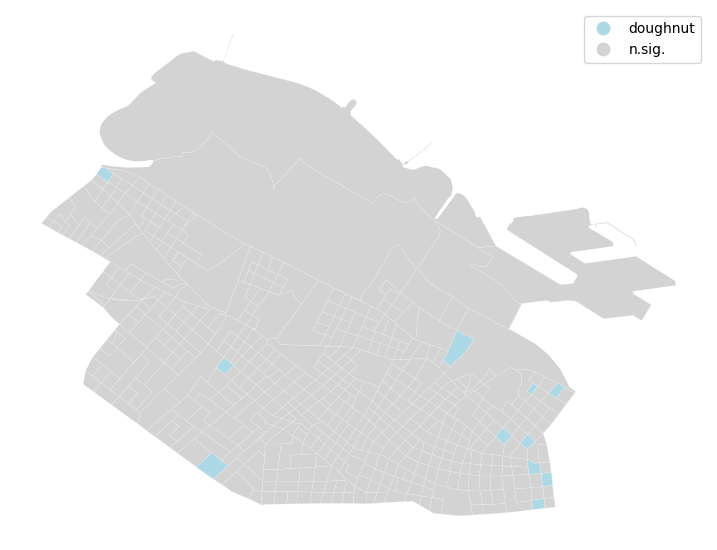

In [68]:
df = comuna2
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [69]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

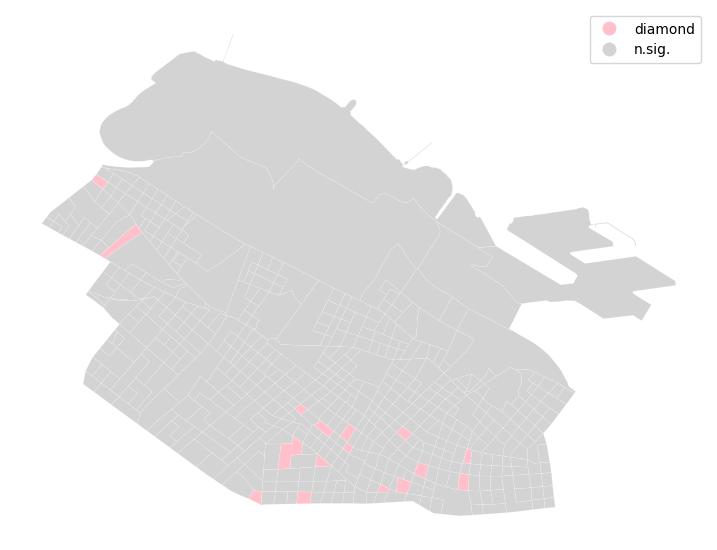

In [70]:
df = comuna2
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [71]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 4, 0, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 4, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

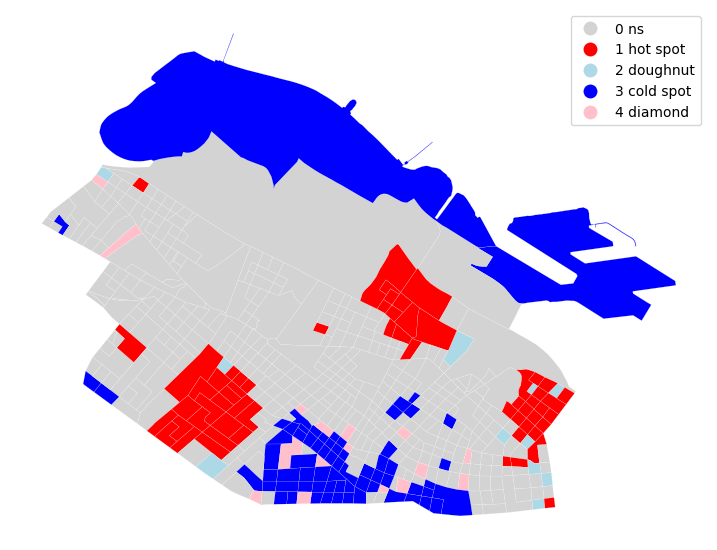

In [73]:
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [74]:
caba_frac = radios_dptos.dissolve('frac', aggfunc = 'mean')
caba_frac


geometry            id  \
frac                                                                    
1.0   MULTIPOLYGON (((7084464.851 6158356.445, 70844...  22087.214286   
2.0   MULTIPOLYGON (((7088196.346 6153826.822, 70882...  24038.194352   
3.0   MULTIPOLYGON (((7088944.296 6153099.676, 70889...  24037.005517   
4.0   MULTIPOLYGON (((7088732.511 6154869.567, 70886...  25451.962287   
5.0   MULTIPOLYGON (((7089006.687 6155764.149, 70889...  22978.079383   
6.0   MULTIPOLYGON (((7086335.591 6156962.053, 70863...  22684.777872   
7.0   MULTIPOLYGON (((7085329.673 6156335.449, 70853...  29589.433824   
8.0   MULTIPOLYGON (((7089141.770 6153386.665, 70892...  29649.853477   
9.0   MULTIPOLYGON (((7089489.815 6153265.149, 70895...  28600.864247   
10.0  MULTIPOLYGON (((7090586.710 6152734.714, 70905...  20608.068758   
11.0  MULTIPOLYGON (((7090776.096 6152754.881, 70908...  17621.987102   
12.0  MULTIPOLYGON (((7089989.375 6152711.237, 70900...  25868.466262   
13.0  MULTIPOLYGON (((7089849.499 6156521.905, 70896...  25529.855422   
14.0  MULTIPOLYGON (((7089591.156 6155931.915, 70895...  23066.710321   
15.0  MULTIPOLYGON (((7087558.734 6155899.420, 70875...  24356.978190   
16.0  MULTIPOLYGON (((7086581.598 6155018.094, 70866...  24983.561702   
17.0  MULTIPOLYGON (((7090091.123 6155540.113, 70900...  27678.888889   
18.0  MULTIPOLYGON (((7088001.999 6158327.084, 70879...  24299.872165   
19.0  MULTIPOLYGON (((7089152.766 6158560.831, 70891...  19432.952741   
20.0  MULTIPOLYGON (((7089514.916 6161331.838, 70894...  17098.705009   
21.0  MULTIPOLYGON (((7092072.721 6158882.260, 70920...  17127.778416   
22.0  MULTIPOLYGON (((7092553.622 6159524.929, 70926...  24809.300787   
23.0  MULTIPOLYGON (((7091494.075 6165810.904, 70913...  22960.576347   
24.0  MULTIPOLYGON (((7093299.585 6158463.332, 70932...  21399.480861   
25.0  MULTIPOLYGON (((7094473.244 6164191.990, 70945...  26558.989744   
26.0  MULTIPOLYGON (((7091082.048 6165441.131, 70911...  29737.543919   
27.0  MULTIPOLYGON (((7091400.262 6165987.468, 70914...  27917.261905   
28.0  MULTIPOLYGON (((7091795.257 6165674.291, 70917...  22323.484716   
29.0  MULTIPOLYGON (((7092381.915 6165235.044, 70924...  27409.095000   
30.0  MULTIPOLYGON (((7095375.817 6165078.193, 70952...  14062.778894   
31.0  POLYGON ((7095229.181 6165417.182, 7095220.383...  30570.461538   

               area    perimeter  prov      depto  codloc     radio  \
frac                                                                  
1.0    80767.048896  1173.886786   2.0  59.014286    10.0  6.173469   
2.0    75389.047982  1063.241065   2.0  48.511628    10.0  5.687708   
3.0    91365.583152   989.688879   2.0  56.308966    10.0  6.006897   
4.0    45316.368200   887.257318   2.0  53.411192    10.0  5.998783   
5.0    36532.913353   821.879624   2.0  57.883131    10.0  5.820287   
6.0    37547.088247   753.720719   2.0  62.113176    10.0  5.668074   
7.0    43462.147514   885.388780   2.0  57.069005    10.0  6.640271   
8.0    27584.611951   677.002186   2.0  65.850101    10.0  6.561107   
9.0    58194.744259   908.382390   2.0  41.990591    10.0  8.575269   
10.0  196904.022216  1290.950036   2.0  56.042220    10.0  6.440290   
11.0   48638.991732   887.112786   2.0  63.631986    10.0  7.096303   
12.0   53372.265397   919.578796   2.0  58.510235    10.0  6.389689   
13.0  152800.874991  1325.826023   2.0  62.513820    10.0  6.177179   
14.0   41212.067598   793.810897   2.0  50.153513    10.0  5.469211   
15.0   37375.683569   782.188334   2.0  51.190840    10.0  5.111232   
16.0   41108.412274   806.769872   2.0  50.350355    10.0  5.540426   
17.0   30653.130580   738.882576   2.0  57.149758    10.0  5.154589   
18.0   50746.778348   943.627911   2.0  62.480412    10.0  4.727835   
19.0   26419.757212   661.723856   2.0  58.275992    10.0  4.682420   
20.0   26996.686206   664.572725   2.0  62.909091    10.0  5.602968   
21.0   37692.073838   836.206726   2.0  76.702641    10.0  5.735936   
22.0

In [75]:
%matplotlib inline

import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

In [76]:
gdf = comuna2

y = gdf['price'].fillna(gdf.price.mean())
w = Queen.from_dataframe(gdf)
w.transform = 'r'

moran = esda.moran.Moran(y, w)
moran.I

0.3650159579879536

In [77]:
moran.p_sim

0.001

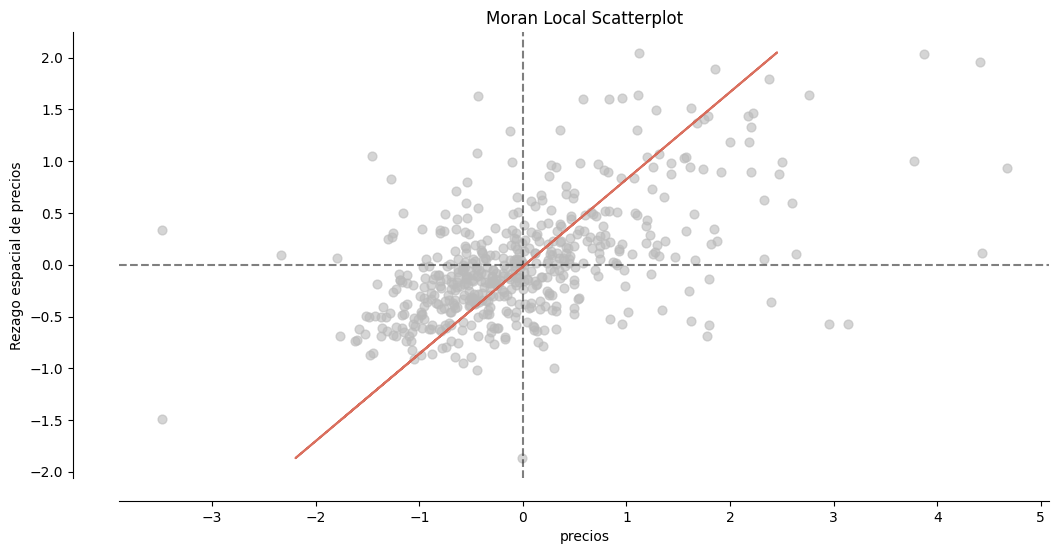

In [78]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# Calculamos Moran_Local y graficamos.
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('precios')
ax.set_ylabel('Rezago espacial de precios')
fig.set_size_inches(12, 10)
plt.show()

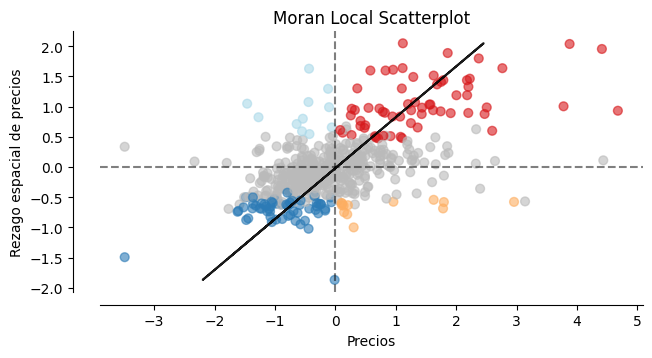

In [79]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Precios')
ax.set_ylabel('Rezago espacial de precios')
plt.show()

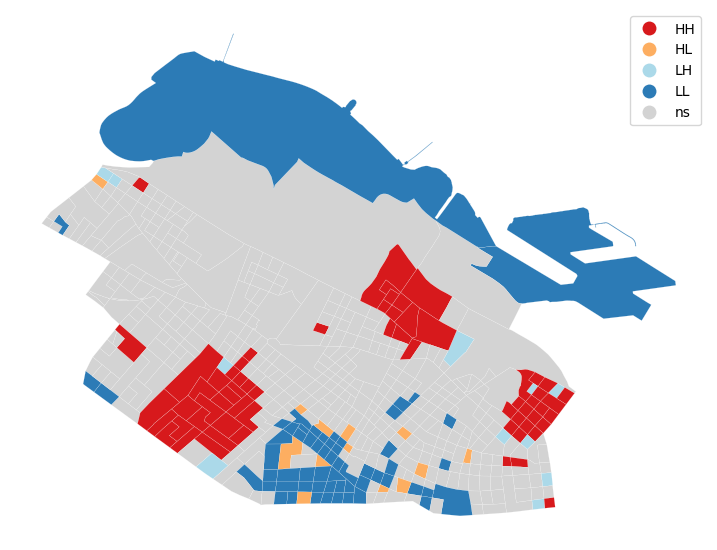

In [80]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9))
plt.show()

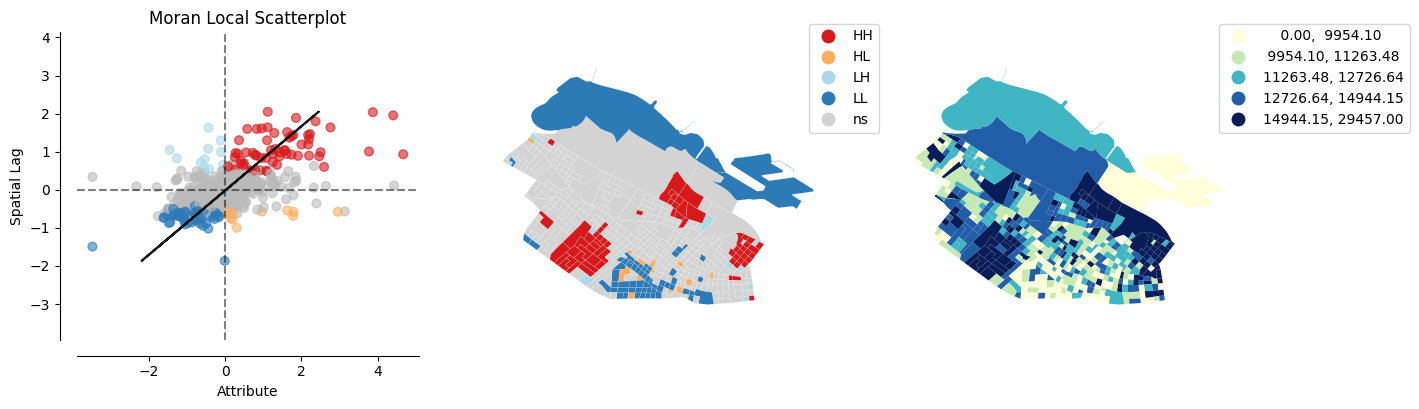

In [81]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'price')
plt.show()

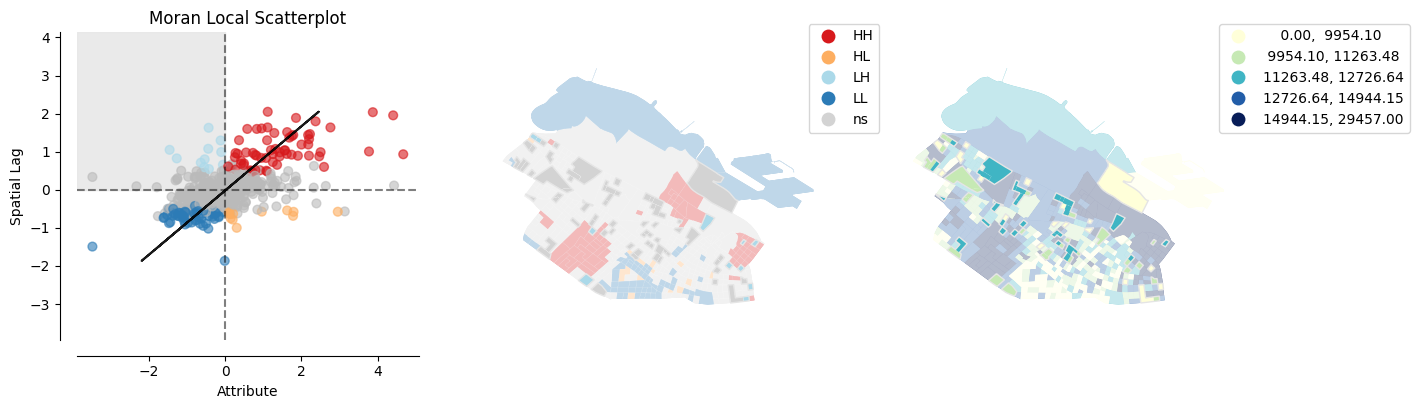

In [82]:
plot_local_autocorrelation(moran_loc, gdf, 'price', quadrant=2)
plt.show()

## **<font color="DeepPink">Estadísticas Bivariadas de Moran</font>**

<p align='justify'>
Además, para evaluar la correlación de una variable sobre el espacio. Es posible inspeccionar la relación de dos variables y su posición en el espacio con las llamadas <b>Estadísticas Bivariadas de Moran</b>. Estos se pueden encontrar en <code>esda.moran.Moran_BV</code>

In [83]:
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv

In [84]:
x = gdf['viviendas'].values

In [85]:
moran = esda.moran.Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

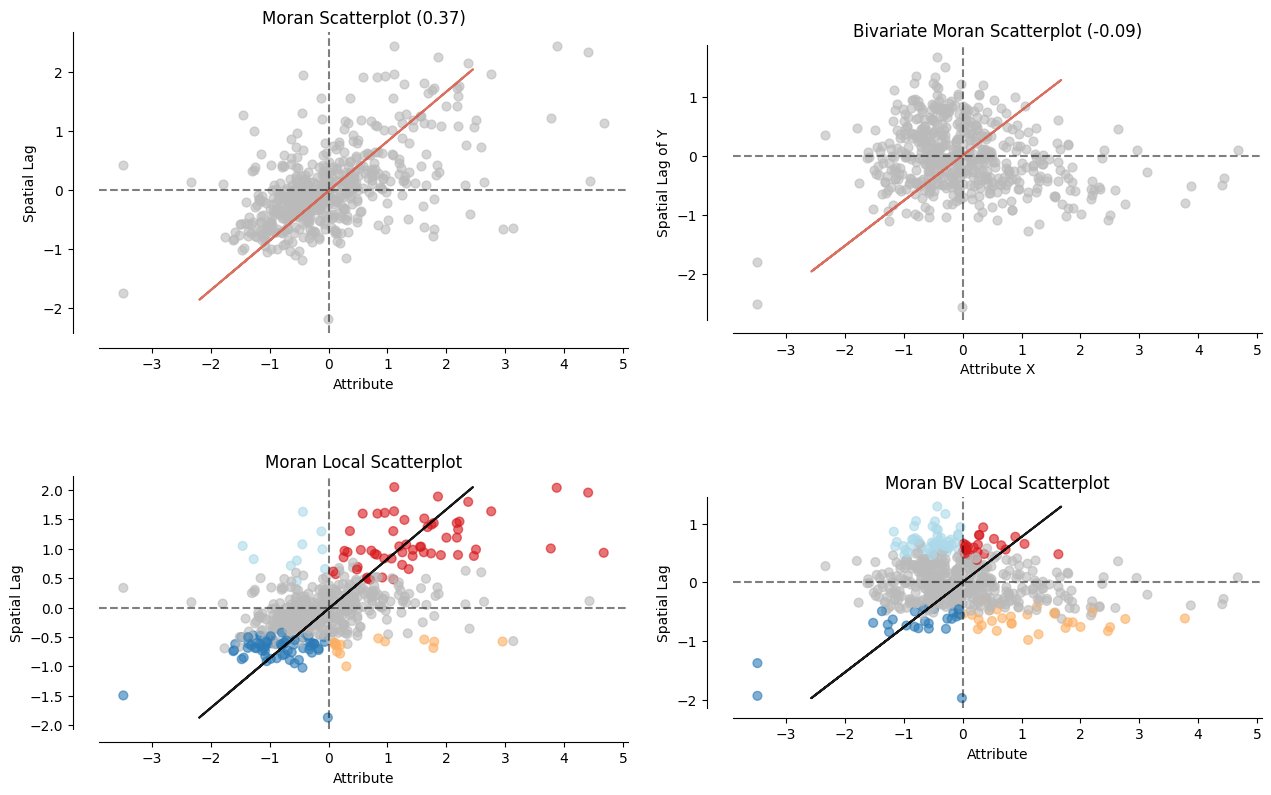

In [86]:
fig, axs = plt.subplots(2, 2, figsize=(15,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()

<p align='justify'>
Como puedes ver, una llamada sencilla a <code>moran_scatterplot</code> te proporciona muchas opciones. Ahora bien, ¿qué son las Estadísticas Bivariadas de Moran?
<br><br>
Las Estadísticas Bivariadas de Moran describen la correlación entre una variable y el rezago espacial de otra variable. Por lo tanto, debemos tener cuidado al interpretar nuestros resultados. Las Estadísticas Bivariadas de Moran no tienen en cuenta la correlación inherente entre las dos variables en la misma ubicación. Más bien, ofrecen una herramienta para medir el grado en que un polígono con un atributo específico se correlaciona con sus polígonos vecinos que tienen un atributo diferente.
<br><br>
splot puede ayudar a interpretar los resultados proporcionando visualizaciones de distribuciones de referencia y un gráfico de dispersión de Moran (Moran Scatterplot):

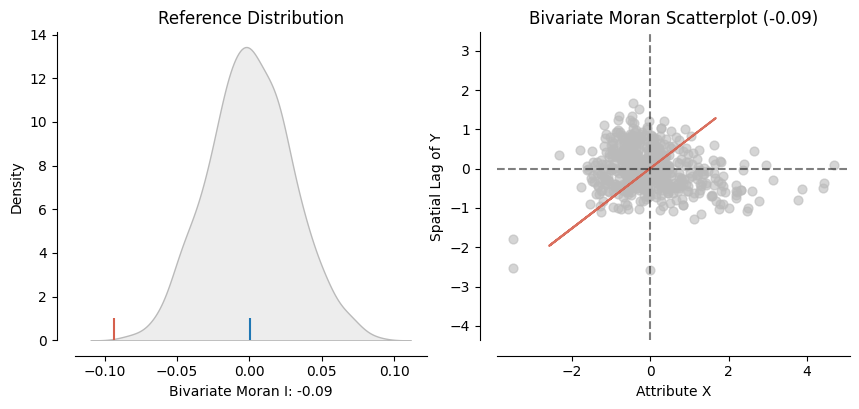

In [87]:
plot_moran_bv(moran_bv)
plt.show()

## **<font color="DeepPink">Estadísticas Bivariadas Locales de Moran</font>**

<p align='justify'>
Similar a las estadísticas locales univariadas de Moran Pysal y Splot ofrecen herramientas para evaluar la autocorrelación local para el análisis bivariado.


In [88]:
from esda.moran import Moran_Local_BV

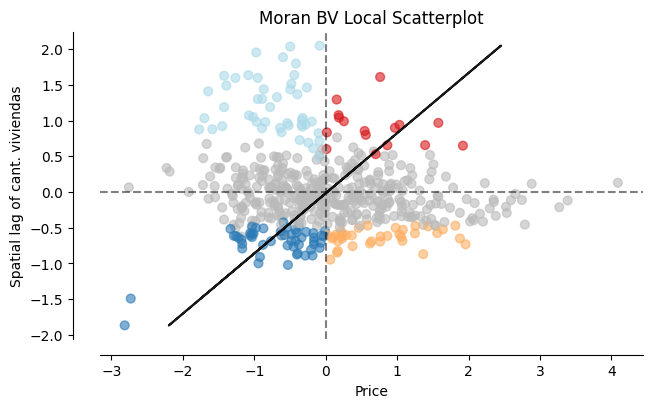

In [89]:
moran_loc_bv = Moran_Local_BV(x, y, w)
fig, ax = moran_scatterplot(moran_loc_bv, p=0.05)
ax.set_xlabel('Price')
ax.set_ylabel('Spatial lag of cant. viviendas')
plt.show()

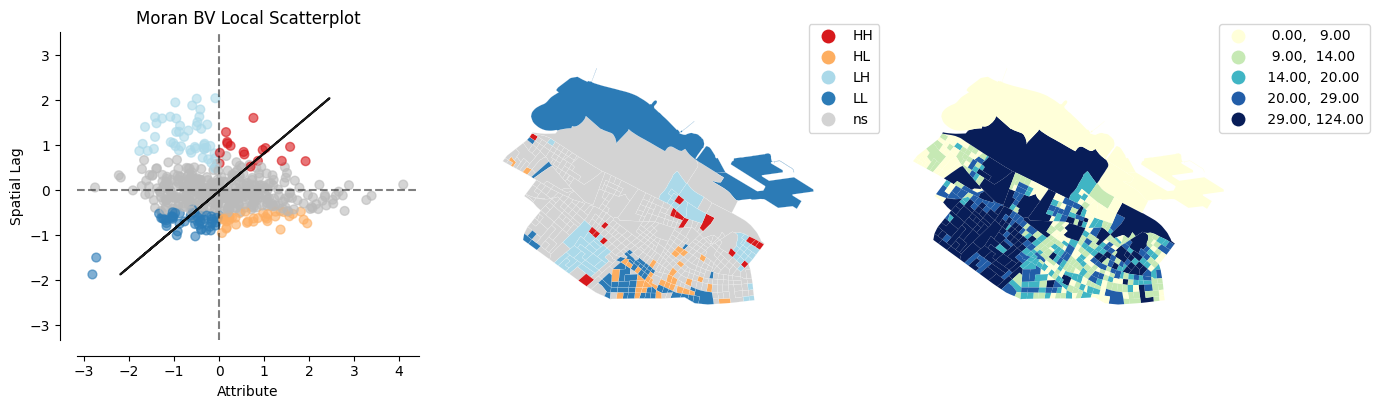

In [90]:
plot_local_autocorrelation(moran_loc_bv, gdf, 'cantidad')
plt.show()

# **<font color="DeepPink">Clustering</font>**

<p align='justify'>
A diferencia de las anteriores técnicas que son análisis univariados o a lo sumo bivariados, con el clustering podemos realizar análisis multivariado.
<br><br>
El clustering espacial o regionalización busca agrupar los datos de acuerdo a características similares, pero además pone foco en la forma. Esto quiere decir que vamos a tener como objetivo que se formen regiones de áreas que permanezcan contigüas en el espacio.
<br><br>
A cualquier técnica de clustering habitual se le puede pasar como variables las coordenadas de los centroides para que las tengan en cuenta como unas variables más. Probemos por ejemplo con <b>k-means</b>.

In [91]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [92]:
gdf = radios
#gdf = comuna2

In [93]:
gdf['cant'] = radios_dptos.groupby('link').count().iloc[:,0]

In [94]:
# Obtenemos los centroides
gdf['longitud'] = radios.geometry.centroid.x
gdf['latitud'] = radios.geometry.centroid.y

In [95]:
km = make_pipeline(StandardScaler(),KMeans() )

gdf = gdf.fillna(0)
gdf.columns

Index(['geometry', 'nomdepto', 'area', 'perimeter', 'depto', 'viviendas',
       'casas', 'dptos1', 'dptos2', 'cantidad', 'price', 'bedrooms', 'cant',
       'longitud', 'latitud'],
      dtype='object')

In [96]:
columnas = ['viviendas', 'cantidad', 'price', 'bedrooms', 'longitud','latitud']
X = gdf[columnas]
km.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('kmeans', KMeans())])

<Axes: >

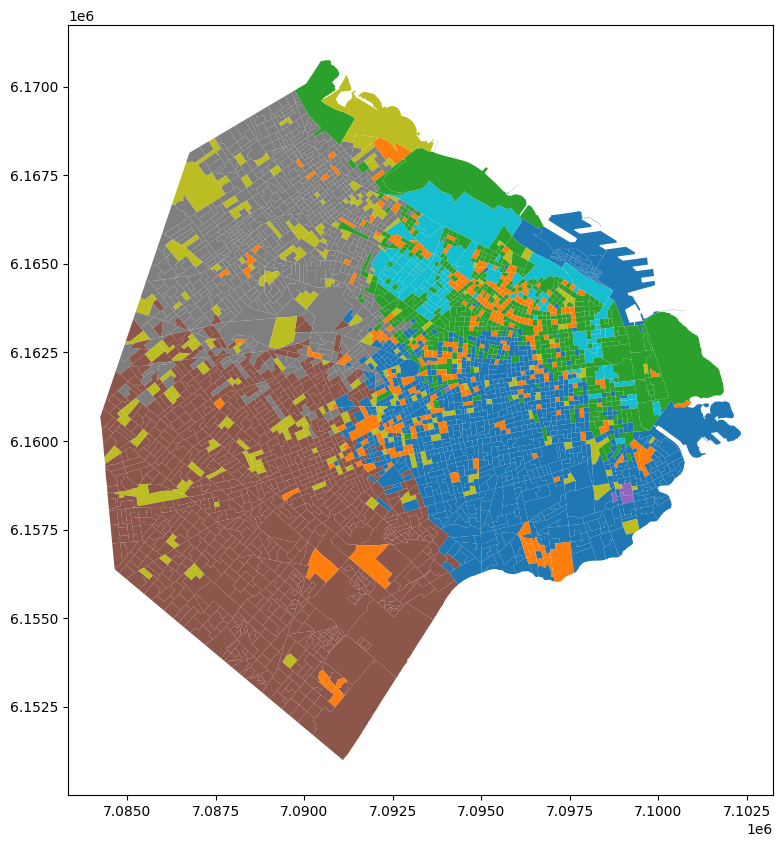

In [97]:
gdf.plot(km.predict(X), figsize = (12,10), categorical = True)

In [98]:
sca = StandardScaler()
X_scaled = sca.fit_transform(X)
X_scaled

array([[-2.86004344,  0.09786083,  0.70113535, -0.40392677,  1.74097332,
         0.80156032],
       [-1.54095734, -0.56471663, -0.99636267, -0.40392677,  1.29414179,
         1.03956347],
       [-1.85912886, -0.56471663, -0.99636267, -0.40392677,  1.27522194,
         1.02351213],
       ...,
       [ 0.27527178,  0.66578437,  0.26440866, -0.40392677,  0.29595417,
         0.35380155],
       [-0.98415717, -0.18610094,  0.60365899,  0.0633459 ,  0.32430902,
         0.37623637],
       [ 0.70612905,  1.70697752,  0.44103525, -0.09241166,  0.3696346 ,
         0.39044851]])

In [99]:
w = Queen.from_dataframe(gdf)
w = KNN.from_dataframe(gdf, k = 6)

In [100]:
aglo = AgglomerativeClustering(n_clusters = 8, connectivity= w.sparse)

In [101]:
aglo.fit(X_scaled[:,:-2])


AgglomerativeClustering(connectivity=<3778x3778 sparse matrix of type '<class 'numpy.float64'>'
	with 22668 stored elements in Compressed Sparse Row format>,
                        n_clusters=8)

<Axes: >

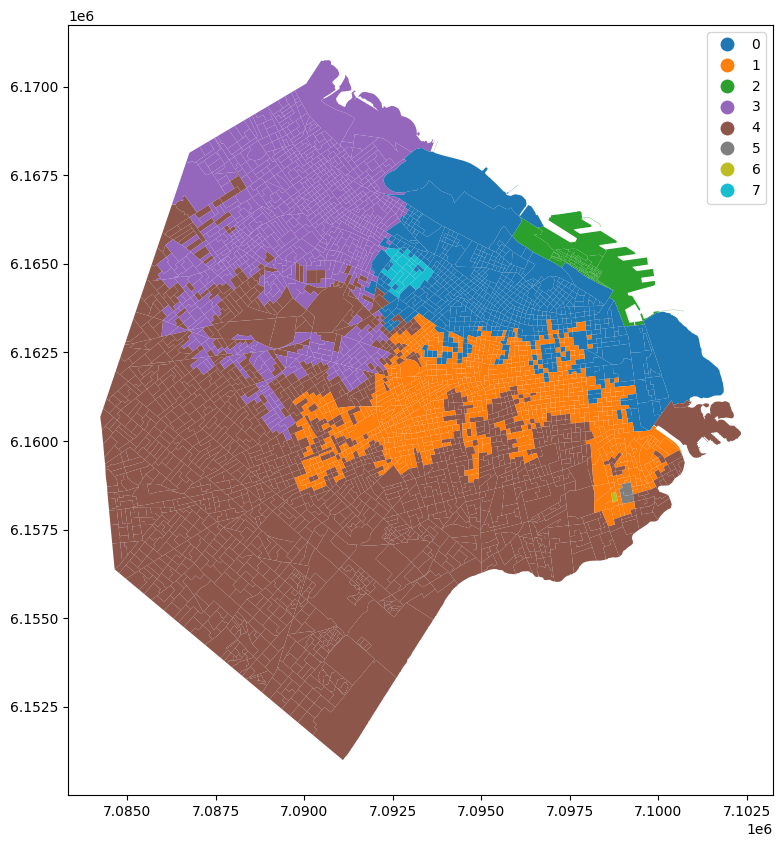

In [102]:
gdf.plot(aglo.labels_, figsize = (12,10), categorical = True, legend = True)

In [103]:
columnas

['viviendas', 'cantidad', 'price', 'bedrooms', 'longitud', 'latitud']

<Axes: >

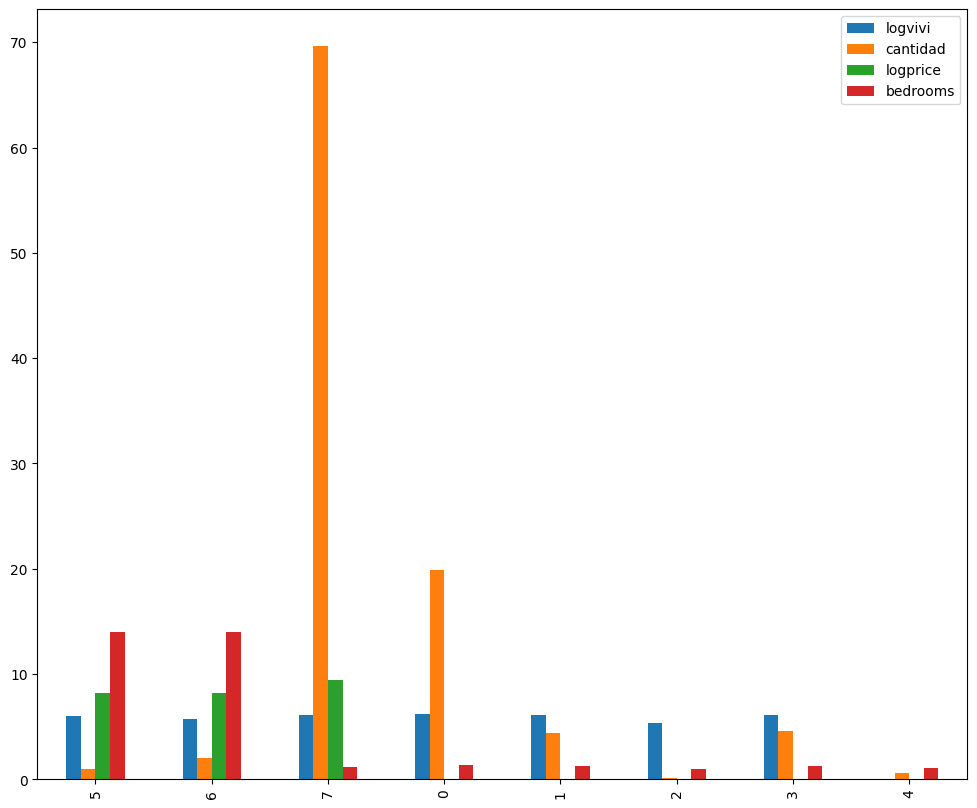

In [104]:
gdf['logprice'] = np.log(gdf['price'])
gdf['logvivi'] = np.log(gdf['viviendas'])

gdf.groupby(aglo.labels_).mean()[['logvivi', 'cantidad', 'logprice', 'bedrooms']].sort_values('logprice').plot(kind = 'bar', figsize = (12,10))

In [105]:
#gdf.explore(aglo.labels_, categorical = True, legend = True)

In [106]:
gdf[columnas[:-2]].dtypes

viviendas    float64
cantidad     float64
price        float64
bedrooms     float64
dtype: object

In [107]:
import spopt
model = spopt.region.Skater(
    gdf,
    w,
    columnas[:-2],
    n_clusters=8,
    #floor=floor,
    #trace=trace,
    #islands=islands,
    #spanning_forest_kwds=spanning_forest_kwds
)
model.solve()

<Axes: >

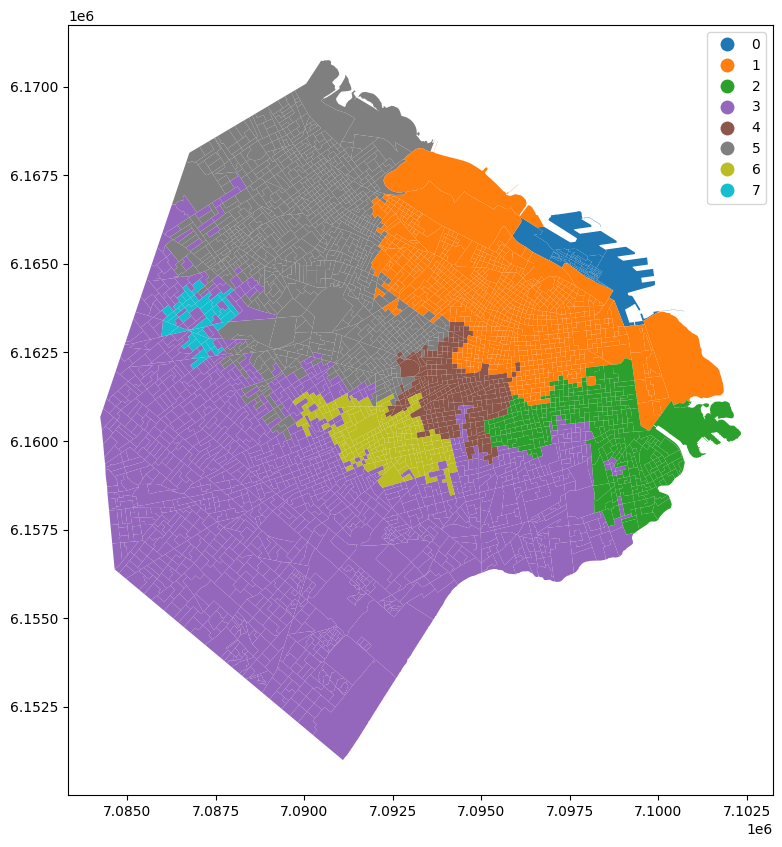

In [108]:
gdf.plot(model.labels_, figsize = (12,10), categorical = True, legend = True)

<Axes: >

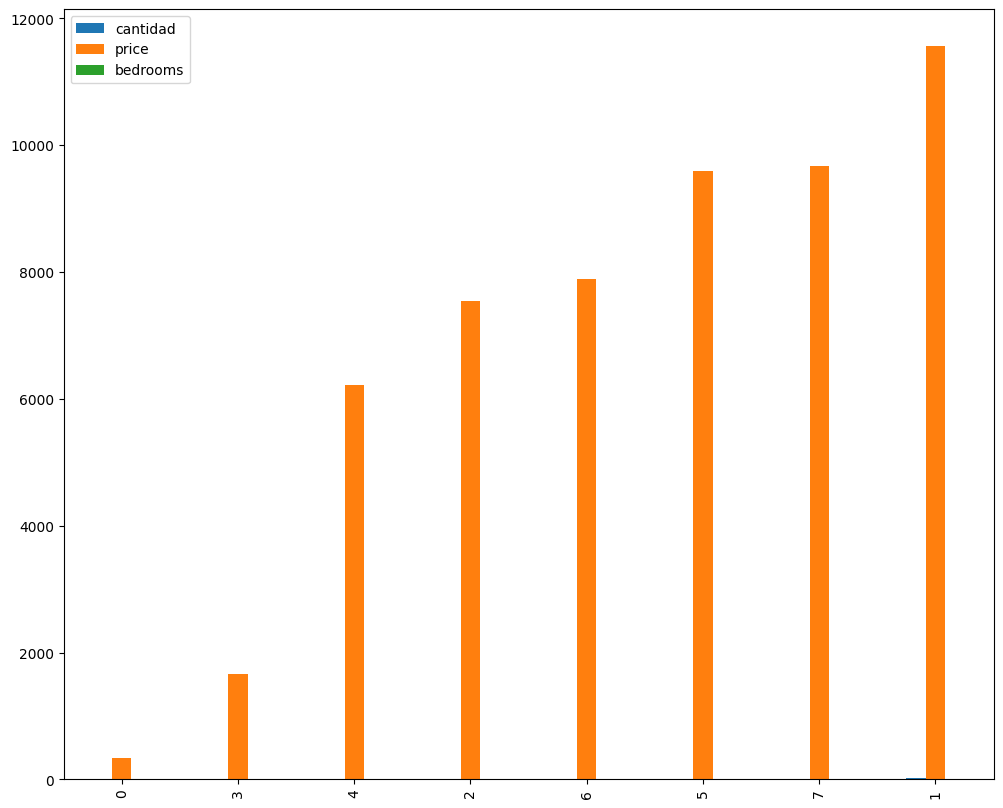

In [109]:
gdf.groupby(model.labels_).mean()[columnas[1:-2]].sort_values('price').plot(kind = 'bar', figsize = (12,10))

In [110]:
gdf.groupby(model.labels_).mean()

area    perimeter      depto   viviendas      casas     dptos1  \
0  80495.378196  1115.897393   7.250000  247.696429   2.678571   0.892857   
1  40862.861365   702.887931  46.055758  504.096970   2.222061  93.760121   
2  45476.174585   850.776475  17.581940  412.959866   6.439799  80.937793   
3  74529.119481  1158.985583  56.711584  391.808511  29.333097  58.615209   
4  27697.724107   687.619455  37.253219  481.982833   6.018455  88.485408   
5  49332.002407   910.870609  89.290509  446.587963  14.761111  83.265741   
6  33036.688979   750.396644  44.886598  474.917526  10.484536  87.718041   
7  53134.485974  1056.448184  86.394737  416.526316  25.881579  73.263158   

      dptos2   cantidad         price  bedrooms       cant      longitud  \
0   0.000000   0.142857    335.147959  1.000000   1.107143  7.097843e+06   
1  73.967030  17.627879  11564.413040  1.320574  17.648485  7.095603e+06   
2  61.768227   6.695652   7537.488222  1.423166   6.829431  7.098089e+06   
3  33.459259   0.294720   1658.268797  1.064273   1.102443  7.090128e+06   
4  61.537768   3.570815   6213.539787  1.222745   3.776824  7.094218e+06   
5  65.323958   5.059028   9588.453989  1.269402   5.127315  7.090369e+06   
6  69.477320   1.742268   7884.788660  1.255069   1.871134  7.092270e+06   
7  56.855263   1.894737   9666.486842  1.256579   1.894737  7.087009e+06   

        latitud  logprice   logvivi  
0  6.164921e+06       NaN  5.367861  
1  6.163729e+06       NaN  6.150335  
2  6.160283e+06       NaN  5.955622  
3  6.158590e+06       NaN       NaN  
4  6.161447e+06       NaN  6.110485  
5  6.165420e+06       NaN  6.065383  
6  6.160107e+06       NaN  6.118060  
7  6.163426e+06  9.062362  6.011588

 # **<font color="DeepPink">Conclusiones</font>**

<p align="justify">
👀 En este colab nosotros:<br><br>
✅ Generamos una matriz de pesos espaciales con <code>pysal</code> <br>
✅ Calculamos los rezagos espaciales.<br>
✅ Evaluamos la dependencia espacial de nuestros conjuntos de datos. <br>
✅ Detectamos pequeños clústers con los estadísticos locales para medir correlación. <br>
✅ Regionalizacmos con métodos de clusterin con restricción espacial débil y fuerte. <br>

<p align="justify">


<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab, a seguir codeando...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---
